In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import wbgapi as wb
import seaborn as sns
import matplotlib.ticker as mticker
pd.options.display.max_columns=None
pd.options.display.float_format = '{:.0f}'.format

In [2]:
#nombre abreviado de los paises seleccionados
countries_list = ['CHN', 'RUS', 'PHL', 'IND', 'KOR', 'ZAF', 
                  'VEN', 'ARG', 'AUS', 'BRA', 'BOL', 'CHL', 
                  'ECU', 'MEX', 'PER', 'SLV', 'URY', 'PRY',
                  'ESP', 'SWE', 'CHE', 'GBR', 'PRT', 'JPN', 
                  'LBY', 'ITA', 'DEU', 'FRA', 'NOR', 'LUX',
                  'CAN', 'COL', 'USA', 'EGY'
                 ]

# Cargando los datos
El dataset 'df' y 'dfpaises' fue extraido del proceso ETL de Carlos

In [90]:
df = pd.read_csv('indicadores_EVN.csv')
dfpaises = pd.read_csv('countries_EVN.csv', index_col= 'id', usecols = ['value', 'id'])

In [91]:
#Transformaciones para insertar el nombre completo al dataframe
df = df.merge(dfpaises, left_on='country', right_on='id', how='left')

df = df.set_index('country')
nombres = df['value']
df = df.drop(columns=['value'])
df.insert(0, 'full name', nombres)

In [106]:
df.shape

(1292, 21)

In [104]:
df.isna().sum()

full name                                                           0
year                                                                0
Life expectancy at birth, female (years)                           34
Life expectancy at birth, total (years)                            34
Life expectancy at birth, male (years)                             34
Urban population (% of total population)                            0
Rural population (% of total population)                            0
Population growth (annual %)                                        0
Inflation, consumer prices (annual %)                              88
Inflation, GDP deflator (annual %)                                 28
GDP (current US$)                                                  16
GDP per capita (current US$)                                       16
GDP per capita growth (annual %)                                   28
GNI (current US$)                                                  48
Military expenditure

Vemos que no hay muchos datos faltantes por lo que el EDA no se vera afectado por problemas de este tipo

In [103]:
# debido a que todas las columnas del dataset son numericas, podemos sacar muy buena informacion de describe
df.describe()

year  Life expectancy at birth, female (years)  \
count  1292                                      1258   
mean   2004                                        77   
std      11                                         6   
min    1985                                        55   
25%    1994                                        73   
50%    2004                                        78   
75%    2013                                        82   
max    2022                                        88   

       Life expectancy at birth, total (years)  \
count                                     1258   
mean                                        74   
std                                          6   
min                                         53   
25%                                         70   
50%                                         75   
75%                                         79   
max                                         85   

       Life expectancy at birth, male (years)  \
count                                    1258   
mean                                       71   
std                                         6   
min                                        51   
25%                                        67   
50%                                        72   
75%                                        76   
max                                        82   

       Urban population (% of total population)  \
count                                      1292   
mean                                         72   
std                                          16   
min                                          23   
25%                                          64   
50%                                          76   
75%                                          82   
max                                          96   

       Rural population (% of total population)  Population growth (annual %)  \
count                                      1292                          1292   
mean                                         28                             1   
std                                          16                             1   
min                                           4                            -5   
25%                                          18                             0   
50%                                          24                             1   
75%                                          36                             2   
max                                          77                             3   

       Inflation, consumer prices (annual %)  \
count                                   1204   
mean                                      38   
std                                      434   
min                                      -10   
25%                                        2   
50%                                        4   
75%                                        8   
max                                    11750   

       Inflation, GDP deflator (annual %)  GDP (current US$)  \
count                                1264               1276   
mean                                   42      1221913953660   
std                                   430      2724510173408   
min                                   -26         3282449236   
25%                                     2        71132949588   
50%                                     4       318652909728   
75%                                     9      1269470752689   
max                                 12339     25462700000000   

       GDP per capita (current US$)  GDP per capita growth (annual %)  \
count                          1276                              1264   
mean                          19255                                 2   
std                           22601                                 5   
min                             252                               -48   
25%                            3017

Podemos ver que los datos llegan hasta el 2022, y muchos promedios minimos y maximos interesantes pueden ser observados con ese describe

In [24]:
# extrayendo la tasa de mortalidad de la api del banco mundial
deathrate = wb.data.DataFrame('SP.DYN.CDRT.IN', countries_list, mrv=30)

In [25]:
#Transformaciones para que se muestre el nombre del pais completo en vez del nombre abreviado
deathrate = deathrate.merge(dfpaises, left_on='economy', right_on='id', how='left')
nombres = deathrate['value']
deathrate = deathrate.drop(columns=['value'])
deathrate.insert(0, 'full name', nombres)

YR1992  YR1993  YR1994  YR1995  YR1996  YR1997  YR1998  \
full name                                                                    
Argentina            7.595   7.631   7.403   7.535   7.541   7.778   7.651   
Australia            7.100   6.900   7.100   6.900   7.000   7.000   6.800   
Bolivia             11.191  10.736  10.689  10.625  10.525  10.329  10.156   
Brazil               6.951   6.855   6.740   6.685   6.564   6.488   6.429   
Canada               6.900   7.100   7.100   7.200   7.200   7.200   7.200   
Switzerland          9.100   9.000   8.900   9.000   8.900   8.900   8.800   
Chile                5.201   5.316   5.217   5.352   5.337   5.138   5.258   
China                6.640   6.640   6.490   6.570   6.560   6.510   6.500   
Colombia             5.780   5.710   5.653   5.580   5.536   5.476   5.442   
Germany             11.000  11.100  10.900  10.800  10.800  10.500  10.400   
Ecuador              5.498   5.468   5.375   5.330   5.275   5.222   5.157   
Egypt, Arab Rep.     7.684   7.453   7.264   7.025   6.836   6.653   6.570   
Spain                8.500   8.600   8.600   8.700   8.800   8.700   9.000   
France               9.200   9.200   9.100   9.100   9.100   9.100   9.100   
United Kingdom      11.000  11.400  10.800  11.100  10.900  10.800  10.800   
India               10.230  10.021   9.807   9.612   9.419   9.229   9.050   
Italy                9.600   9.700   9.700   9.800   9.700   9.800  10.000   
Japan                6.900   7.100   7.100   7.400   7.200   7.300   7.500   
Korea, Rep.          5.400   5.200   5.400   5.300   5.200   5.300   5.200   
Libya                4.395   4.348   4.281   4.198   4.187   4.300   4.385   
Luxembourg          10.300   9.800   9.400   9.300   9.400   9.400   9.200   
Mexico               5.584   5.489   5.403   5.316   5.235   5.152   5.086   
Norway              10.400  10.800  10.200  10.400  10.000  10.100  10.000   
Peru                 6.753   6.532   6.323   6.294   6.217   6.144   6.056   
Philippines          6.305   6.126   5.982   5.903   5.779   5.711   5.686   
Portugal            10.100  10.600   9.900  10.300  10.600  10.400  10.500   
Paraguay             6.137   6.020   5.932   5.852   5.776   5.734   5.686   
Russian Federation  12.200  14.500  15.700  15.000  14.200  13.800  13.500   
El Salvador          6.929   6.702   6.556   6.478   6.314   6.140   6.087   
Sweden              10.900  11.100  10.500  10.600  10.600  10.600  10.500   
Uruguay              9.401   9.400   9.390   9.363   9.321   9.269   9.214   
United States        8.500   8.800   8.800   8.800   8.800   8.700   8.600   
Venezuela, RB        4.741   4.745   4.820   4.766   4.835   4.677   4.758   
South Africa         7.944   8.052   8.231   8.382   8.691   8.949   9.335   

                    YR1999  YR2000  YR2001  YR2002  YR2003  YR2004  YR2005  \
full name                                                                    
Argentina            7.615   7.600   7.549   7.518   7.864   7.480   7.423   
Australia            6.800   6.700   6.600   6.800   6.600   6.500   6.400   
Bolivia              9.992   9.826   9.636   9.287   9.038   8.787   8.554   
Brazil               6.386   6.399   6.303   6.329   6.313   6.258   6.106   
Canada               7.200   7.100   7.100   7.100   7.100   7.100   7.100   
Switzerland          8.700   8.700   8.500   8.500   8.600   8.100   8.200   
Chile                5.246   4.959   5.157   5.035   5.247   5.293   5.301   
China                6.460   6.450   6.430   6.410   6.400   6.420   6.510   
Colombia             5.432   5.351   5.350   5.260   5.179   5.134   5.072   
Germany             10.300  10.200  10.100  10.200  10.300   9.900  10.100   
Ecuador              5.074   5.007   4.935   4.875   4.821   4.788   4.780   
Egypt, Arab Rep.     6.480   6.384   6.285   6.202   6.318   6.248   6.206   
Spain                9.200   8.900   8.800   8.800   9.100   8.600   8.800   
France               9.100   8.900   8.80

In [32]:
deathrate = deathrate.set_index('full name')

In [33]:
deathrate = deathrate.T

In [123]:
# no hay nulos en este dataset
deathrate.isna().sum()

full name
Argentina             0
Australia             0
Bolivia               0
Brazil                0
Canada                0
Switzerland           0
Chile                 0
China                 0
Colombia              0
Germany               0
Ecuador               0
Egypt, Arab Rep.      0
Spain                 0
France                0
United Kingdom        0
India                 0
Italy                 0
Japan                 0
Korea, Rep.           0
Libya                 0
Luxembourg            0
Mexico                0
Norway                0
Peru                  0
Philippines           0
Portugal              0
Paraguay              0
Russian Federation    0
El Salvador           0
Sweden                0
Uruguay               0
United States         0
Venezuela, RB         0
South Africa          0
dtype: int64

Tasa de muerte por 1000 habitantes, promedio anual

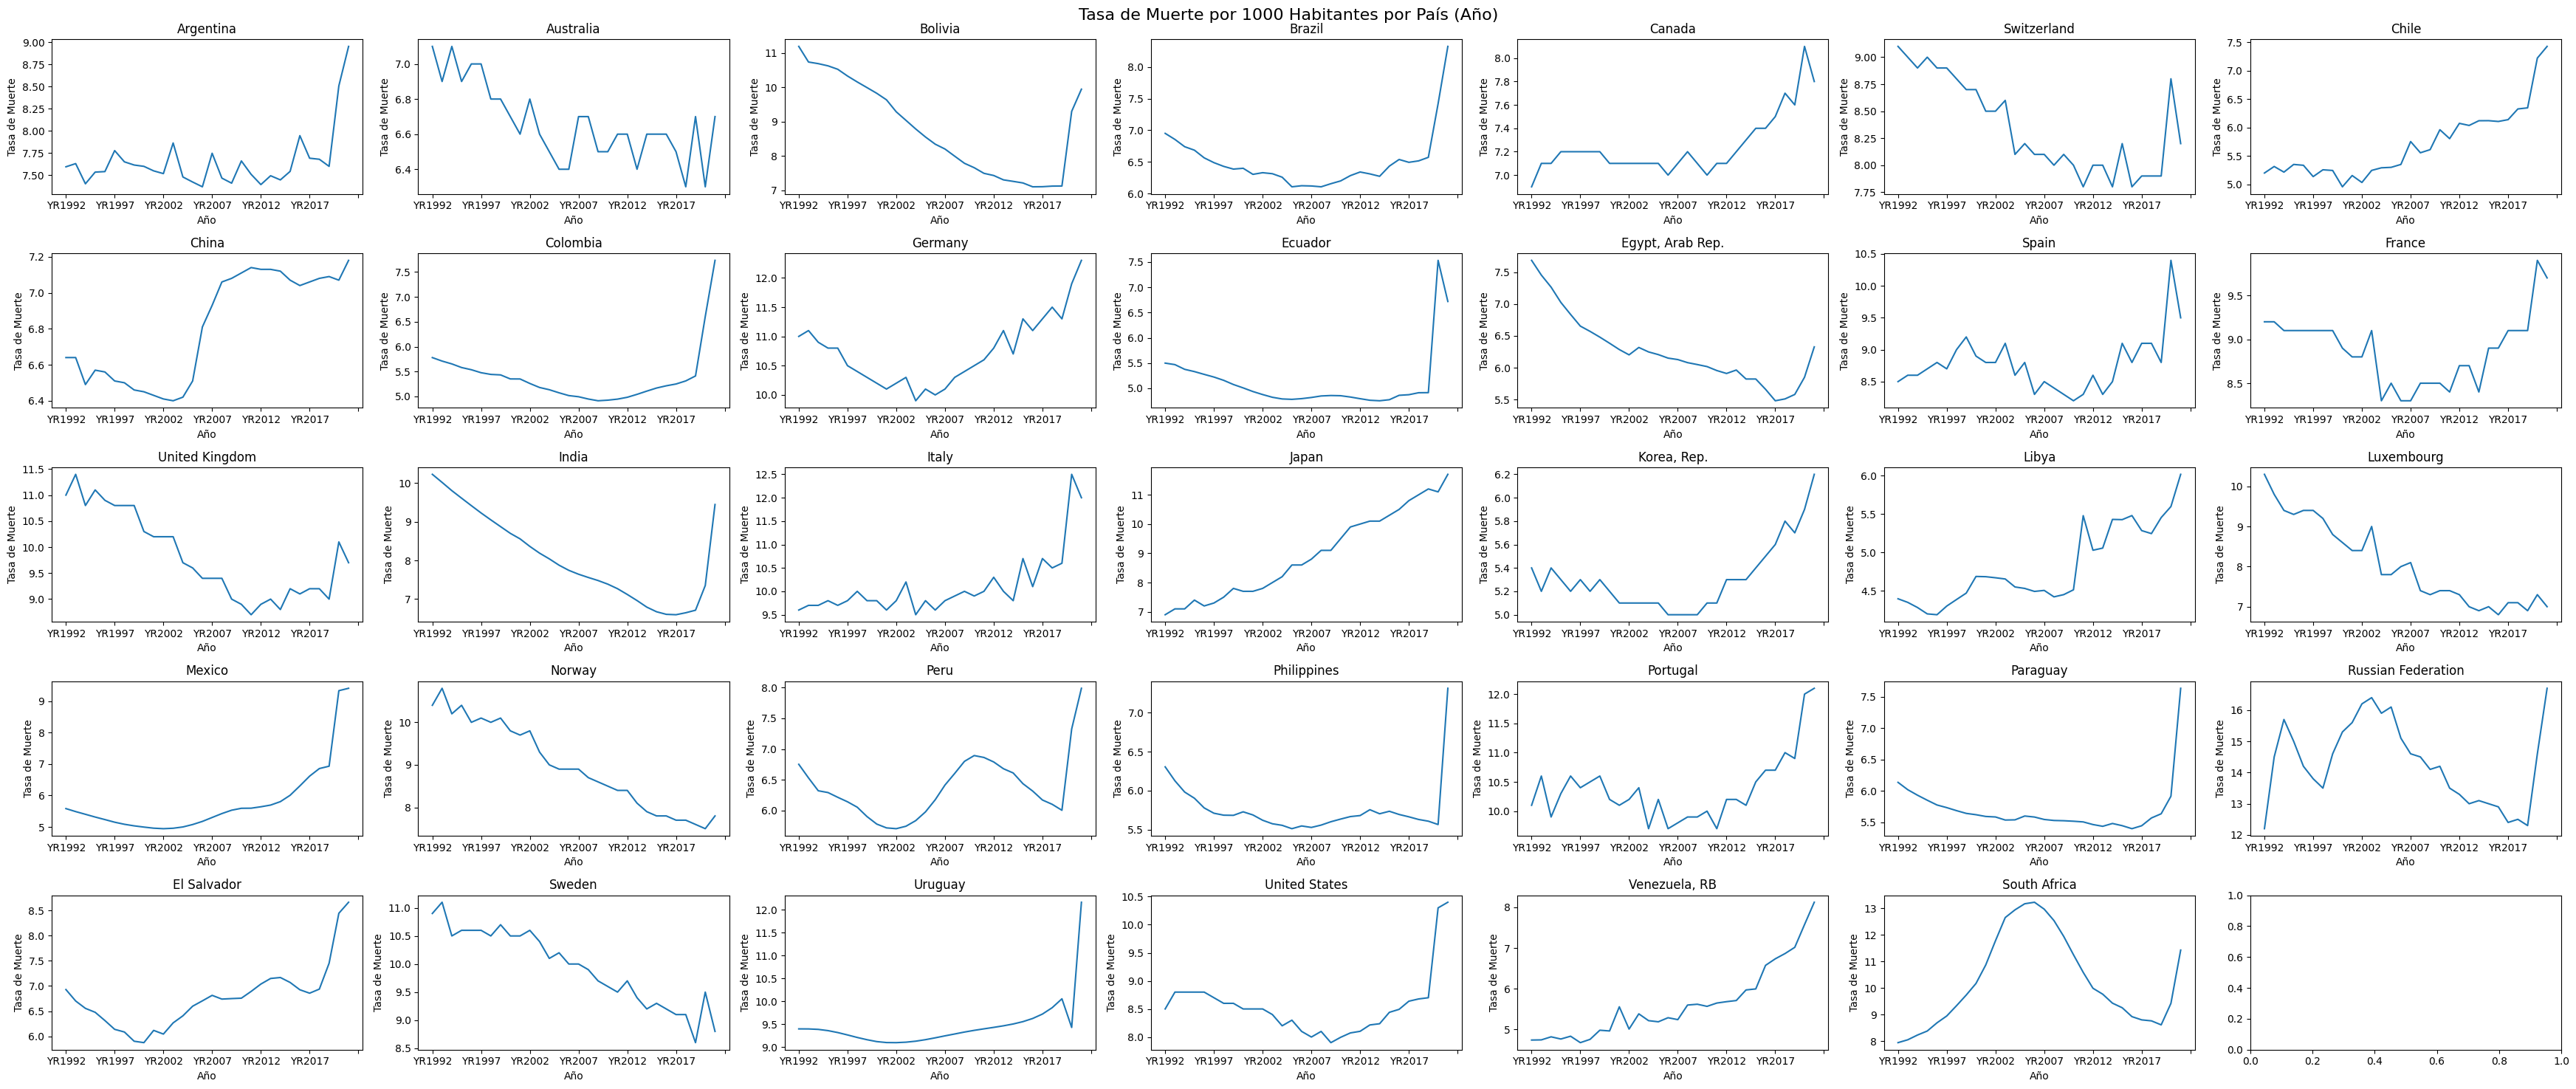

In [74]:
paises = deathrate.columns
num_filas = 5
num_columnas = 7

num_graficos = num_filas * num_columnas

grupos_paises = [paises[i:i+num_graficos] for i in range(0, len(paises), num_graficos)]

for grupo in grupos_paises:
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(35, 15))
    fig.suptitle("Tasa de Muerte por 1000 Habitantes por País (Año)", fontsize=16)

    for i, pais in enumerate(grupo):
        fila = i // num_columnas
        columna = i % num_columnas
        ax = axs[fila, columna]
        deathrate[pais].plot(ax=ax)
        ax.set_title(pais)
        ax.set_xlabel('Año')
        ax.set_ylabel('Tasa de Muerte')

    plt.tight_layout()
    plt.show()

Cargando datos de mortalidad por accidentes de transito

In [70]:
mortalidad = wb.data.DataFrame('SH.STA.TRAF.P5', countries_list, mrv=35)

In [126]:
# sin nulos
mortalidad.isna().sum()

YR2000    0
YR2001    0
YR2002    0
YR2003    0
YR2004    0
YR2005    0
YR2006    0
YR2007    0
YR2008    0
YR2009    0
YR2010    0
YR2011    0
YR2012    0
YR2013    0
YR2014    0
YR2015    0
YR2016    0
YR2017    0
YR2018    0
YR2019    0
dtype: int64

cargando datos de indice de pobreza extraidos de esta [fuente](https://worldpopulationreview.com/country-rankings/poverty-rate-by-country)

In [108]:
dfpoverty = pd.read_excel('pobreza.xlsx')

In [128]:
#muy poco nulos
dfpoverty.isna().sum()

country              0
percPoverty          1
dataYear             0
lessThan10$/day      2
lessThan5.50$/day    2
dtype: int64

Indice de pobreza por pais

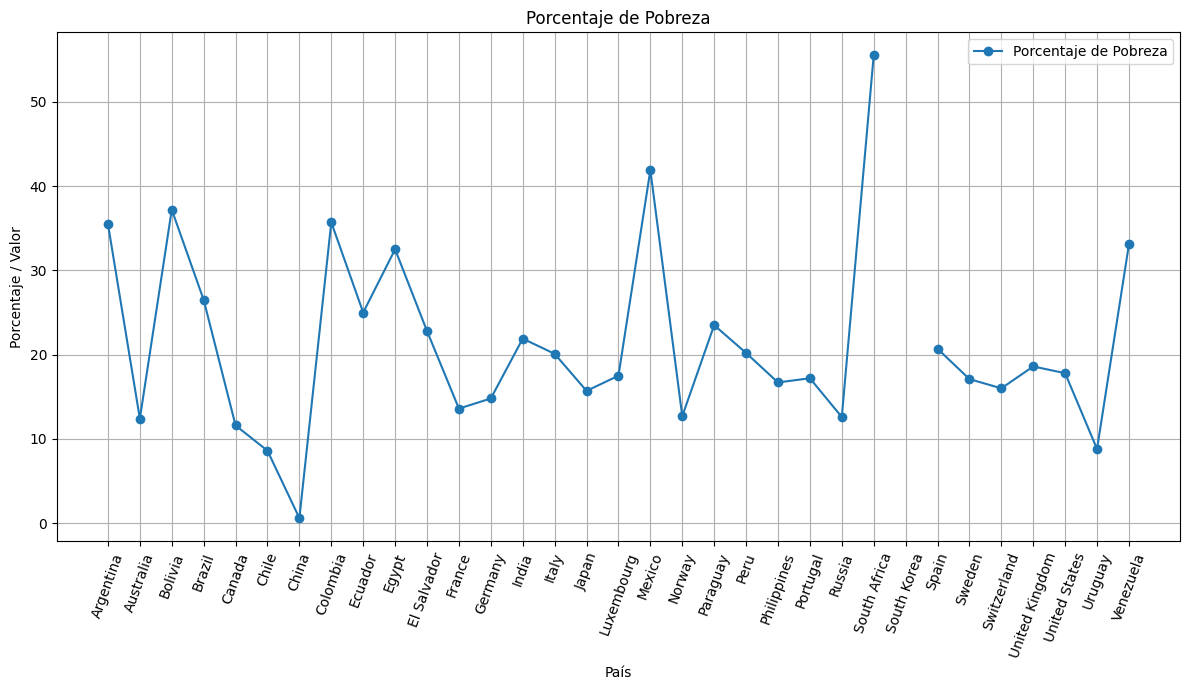

In [21]:
plt.figure(figsize=(12, 7))

plt.plot(dfpoverty['country'], dfpoverty['percPoverty'], label='Porcentaje de Pobreza', marker='o', linestyle='-')


plt.title(f'Porcentaje de Pobreza')
plt.xlabel('País')
plt.ylabel('Porcentaje / Valor')
plt.xticks(rotation=70)  
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [75]:
mortalidad = mortalidad.merge(dfpaises, left_on='economy', right_on='id', how='left')

In [76]:
#mismas transformaciones para usar el nombre completo en la visualizacion
nombres = mortalidad['value']
mortalidad = mortalidad.drop(columns=['value'])
mortalidad.insert(0, 'full name', nombres)
mortalidad = mortalidad.set_index('full name')

YR2000  YR2001  YR2002  YR2003  YR2004  YR2005  YR2006  \
full name                                                                    
Argentina               12      12      10       9      11      12      13   
Australia               10       9       9       8       8       8       8   
Bolivia                 14      15      15      15      15      15      21   
Brazil                  20      20      21      21      22      22      22   
Canada                  10       9      10       9       9      10       9   
Switzerland              8       8       7       8       7       6       5   
Chile                   18      16      16      18      18      18      19   
China                   21      22      22      21      20      21      21   
Colombia                20      20      19      17      18      17      17   
Germany                 10       9       9       8       8       7       7   
Ecuador                 14      15      15      15      14      17      18   
Egypt, Arab Rep.        11      11      12      12      11      11      11   
Spain                   15      14      14      13      12      11      10   
France                  13      13      12      10       9       9       8   
United Kingdom           7       7       7       7       7       7       7   
India                   17      17      16      16      16      16      16   
Italy                   14      14      13      12      11      10      10   
Japan                   12      12      11      11      10       9       9   
Korea, Rep.             26      21      19      19      17      16      16   
Libya                   21      21      22      21      21      21      21   
Luxembourg              18      16      14      12      12      10       9   
Mexico                  14      14      14      15      15      16      16   
Norway                   8       7       7       7       6       5       5   
Peru                    16      16      14      14      15      16      17   
Philippines             10      10      10      10      10      10      10   
Portugal                19      22      21      19      19      18      16   
Paraguay                 9      12       9      12      12      14      17   
Russian Federation      28      29      30      31      30      29      28   
El Salvador             36      35      33      36      36      30      33   
Sweden                   7       7       6       6       6       5       5   
Uruguay                 17      16      12      12      14      13      14   
United States           16      16      16      16      16      16      16   
Venezuela, RB           27      30      30      27      28      27      31   
South Africa            44      38      40      43      41      38      41   

                    YR2007  YR2008  YR2009  YR2010  YR2011  YR2012  YR2013  \
full name                                                                    
Argentina               14      15      13      13      14      13      14   
Australia                8       7       7       6       6       6       5   
Bolivia                 15      17      17      17      18      23      24   
Brazil                  22      23      22      24      24      25      23   
Canada                   9       8       7       7       6       7       6   
Switzerland              5       5       5       4       4       4       3   
Chile                   13      14      12      12      12      12      12   
China                   21      20      20      20      21      20      20   
Colombia                18      18      18      16      16      17      17   
Germany                  6       6       5       5       5       5       4   
Ecuador                 19      20      23      24      25      22      22   
Egypt, Arab Rep.        13      13      13      14      13      10      10   
Spain                    9       7       6       5       5       4       4   
France                   8       7       

Graficando la esperanza de vida de cada pais de manera individual

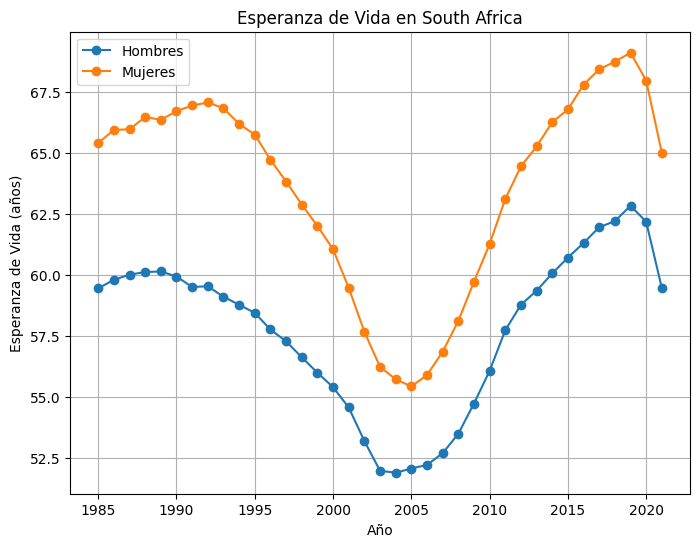

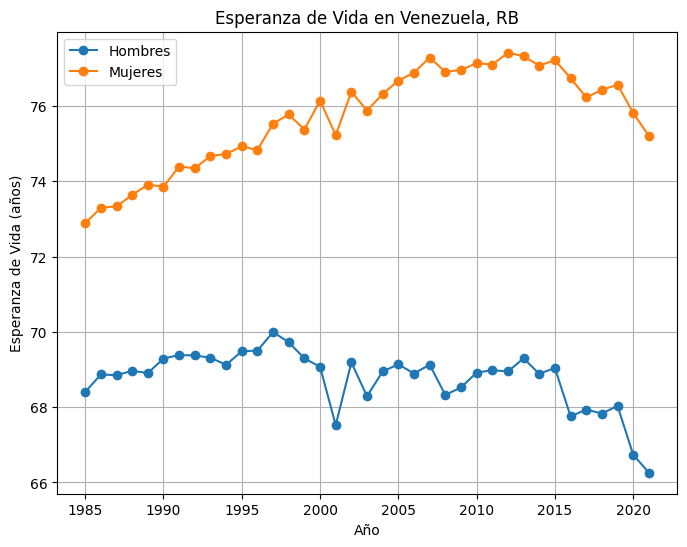

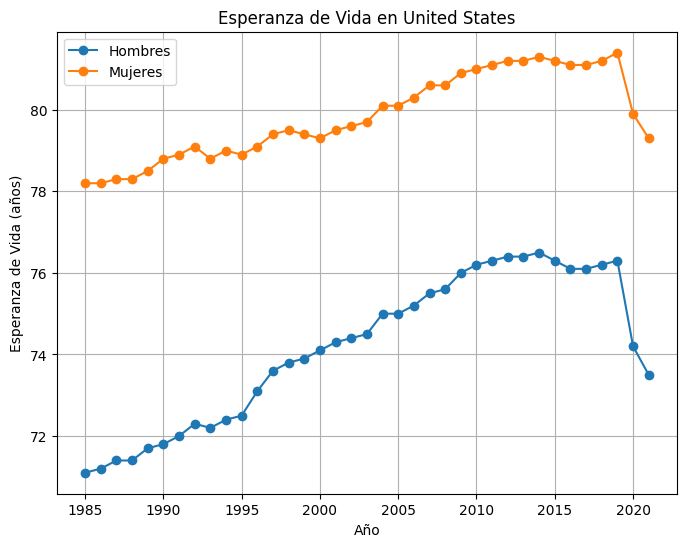

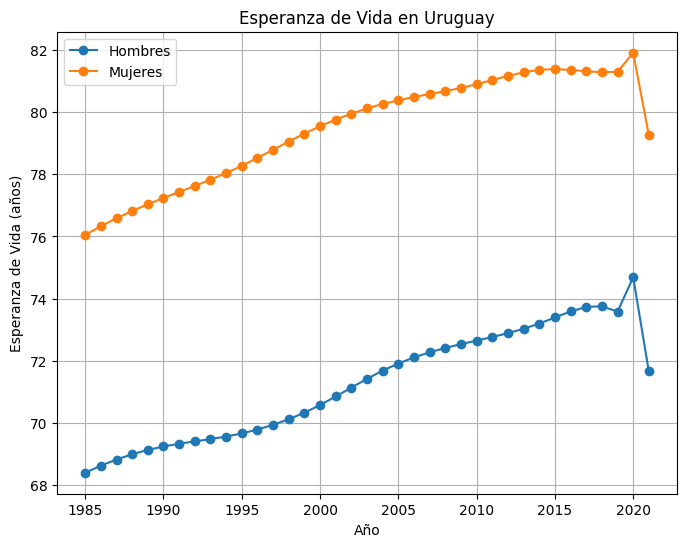

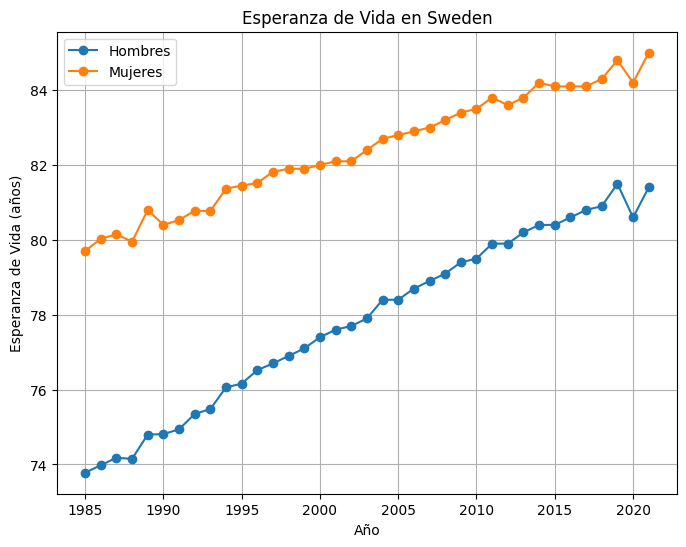

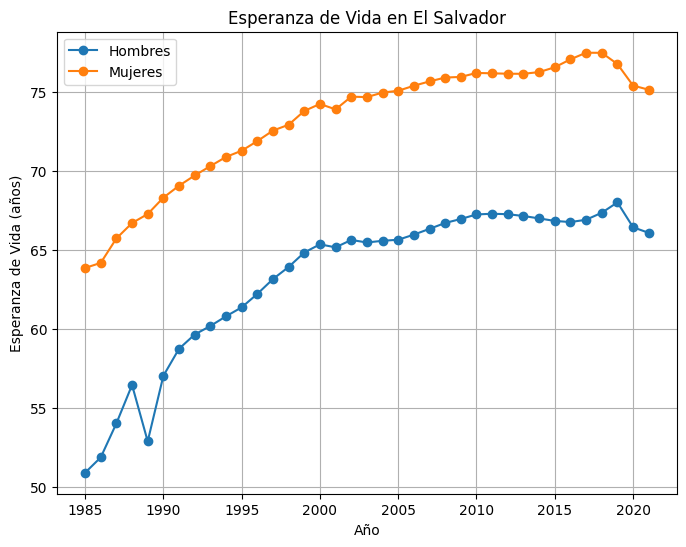

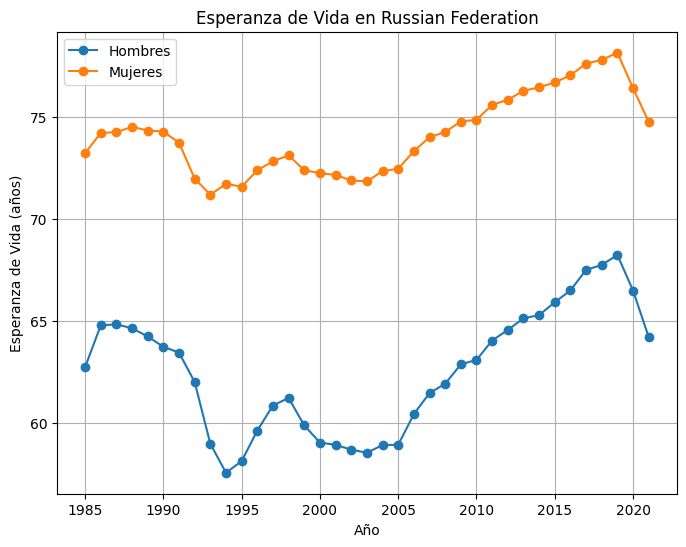

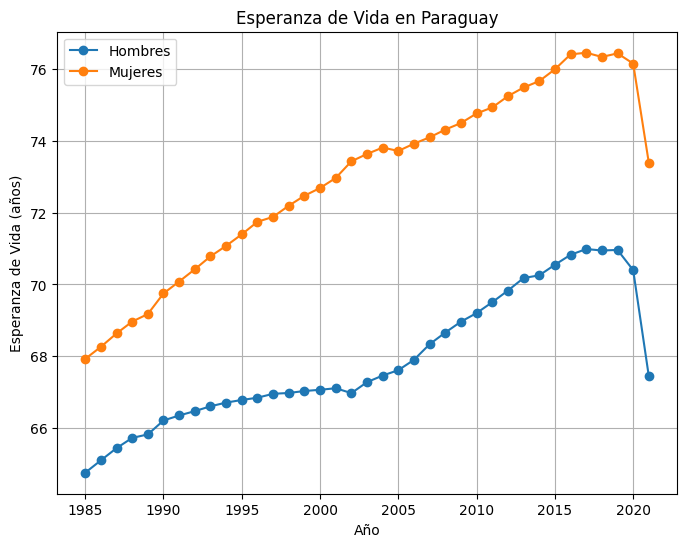

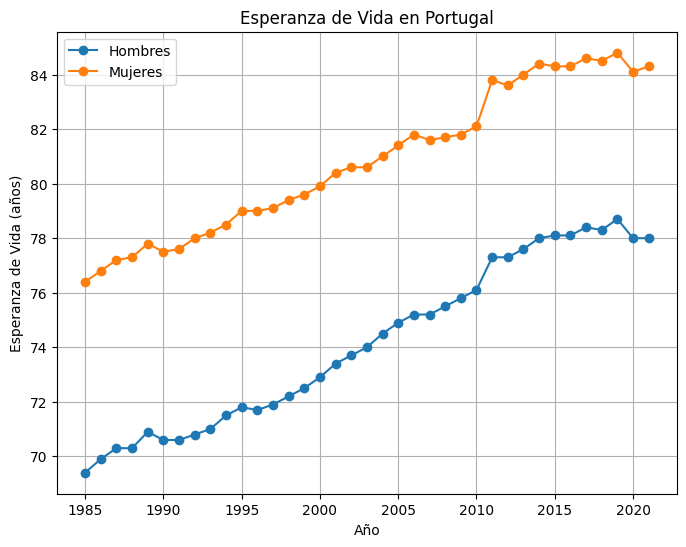

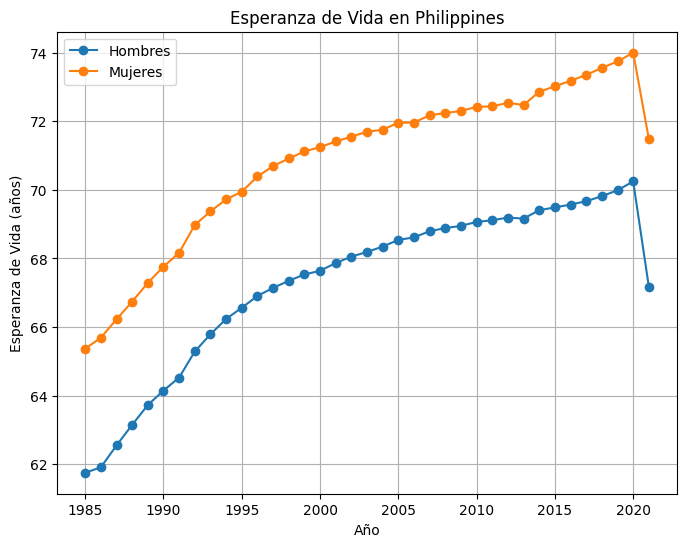

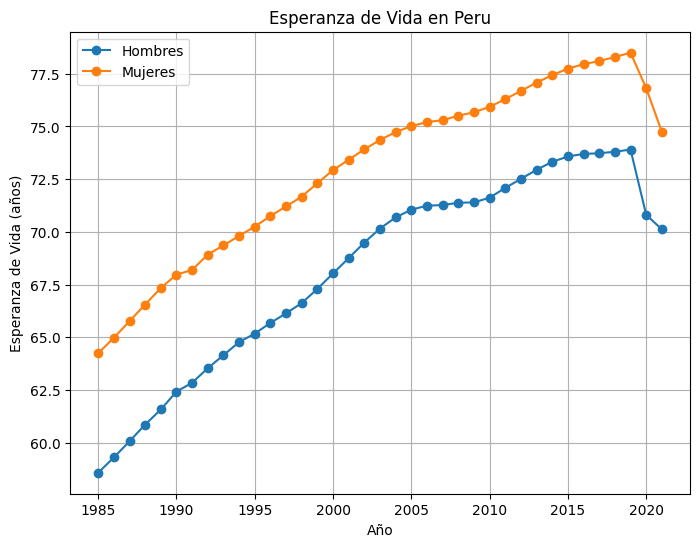

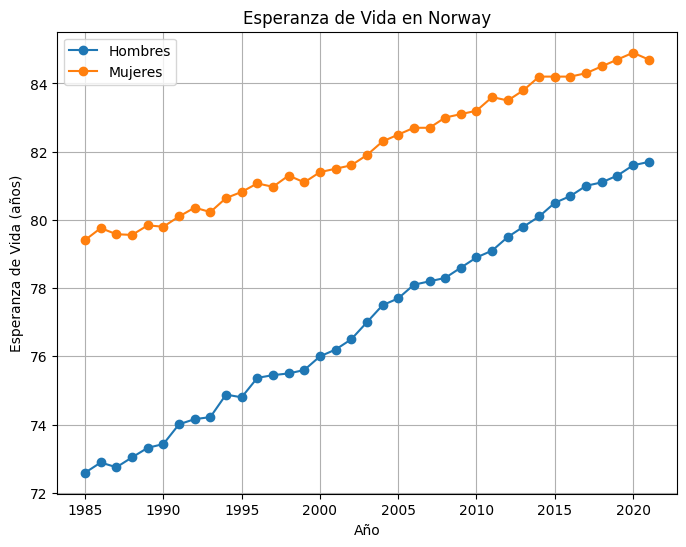

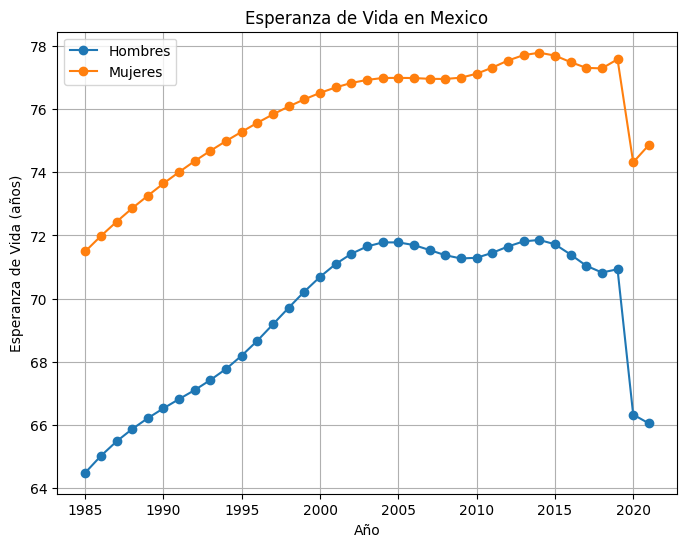

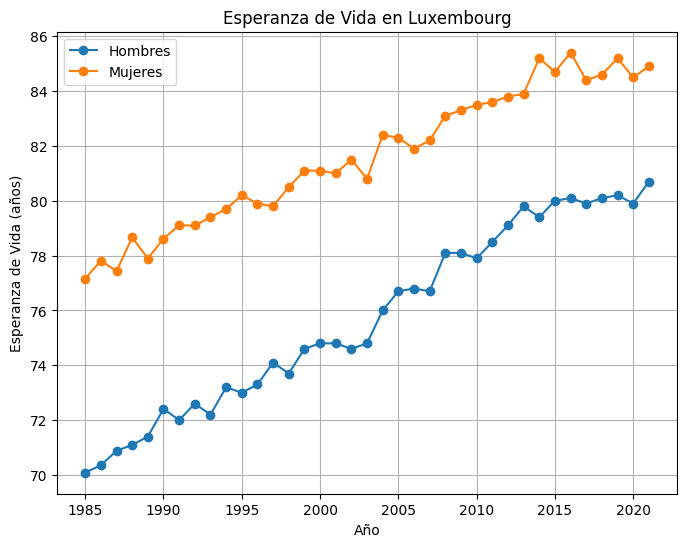

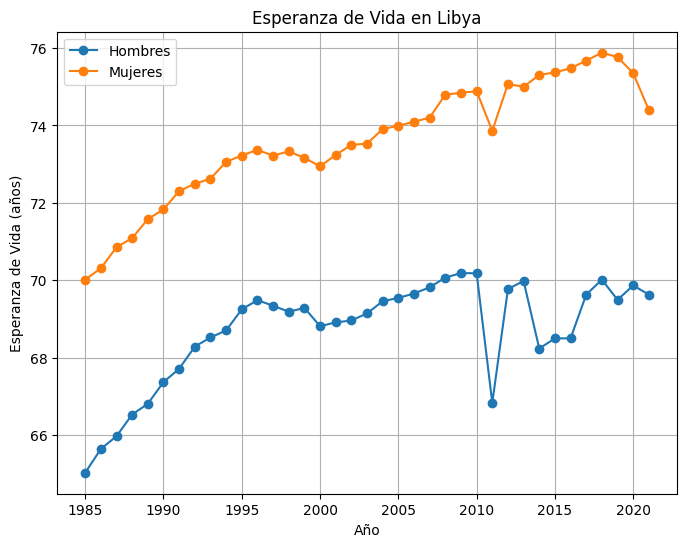

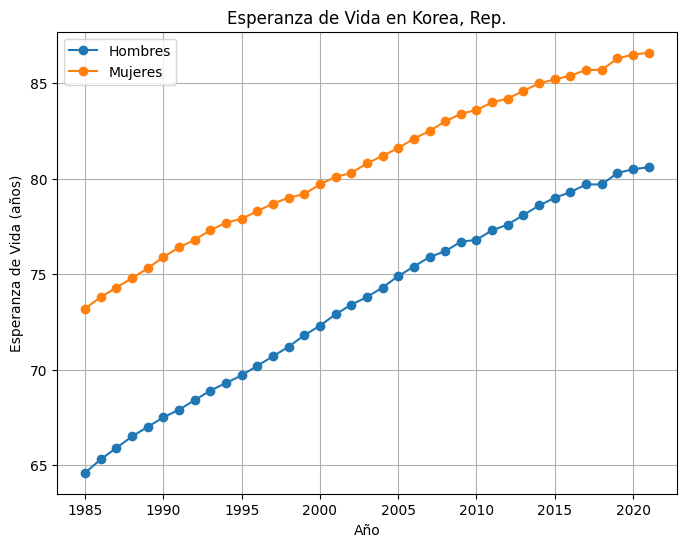

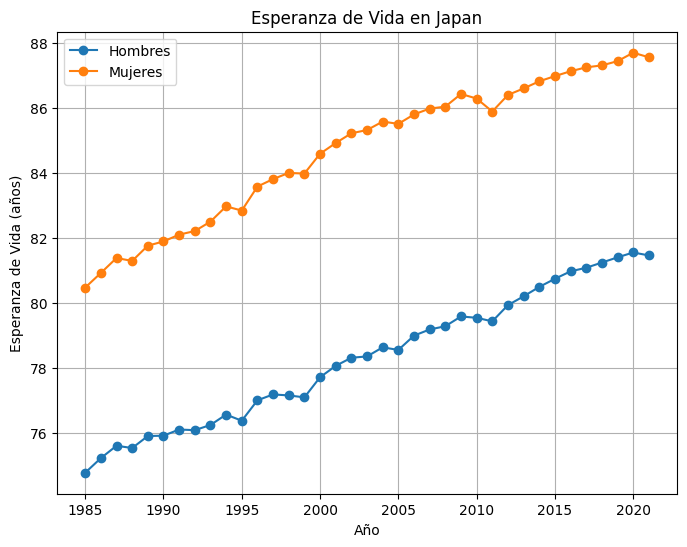

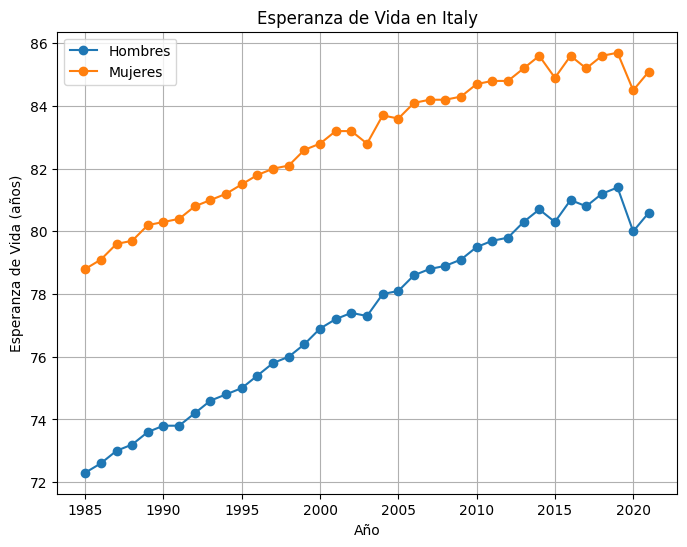

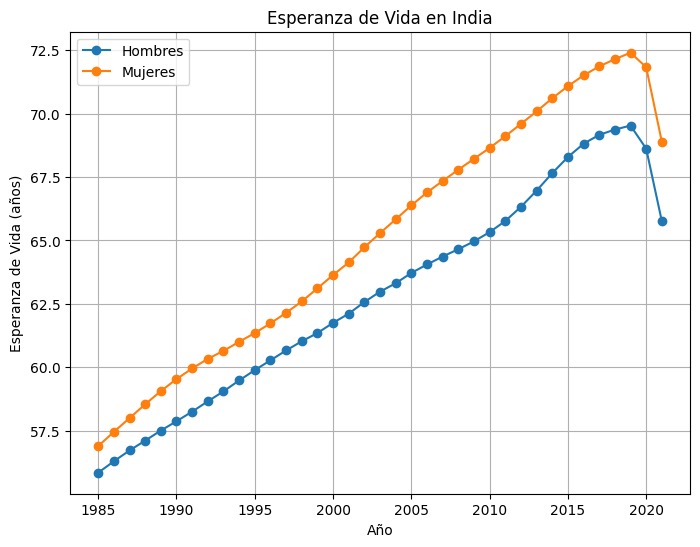

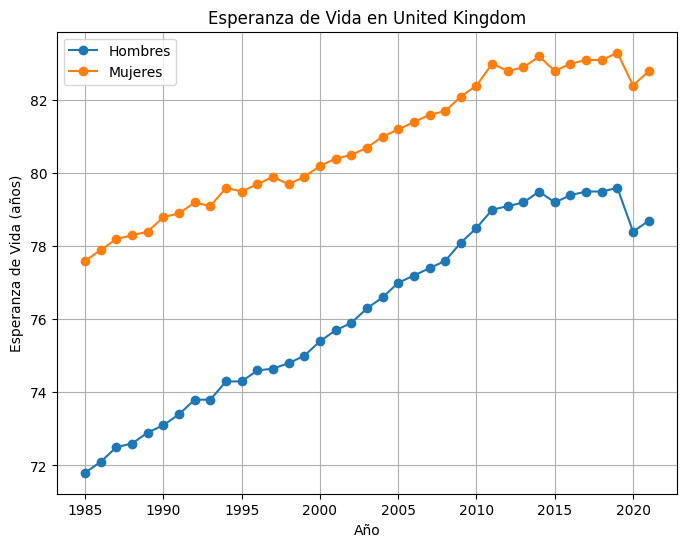

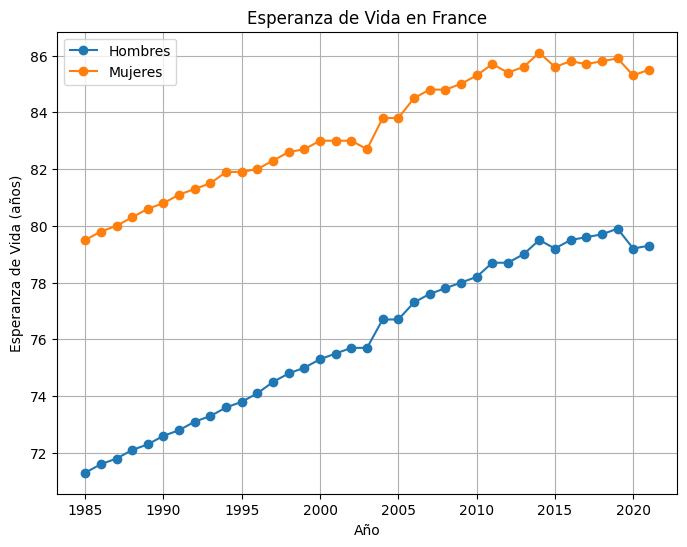

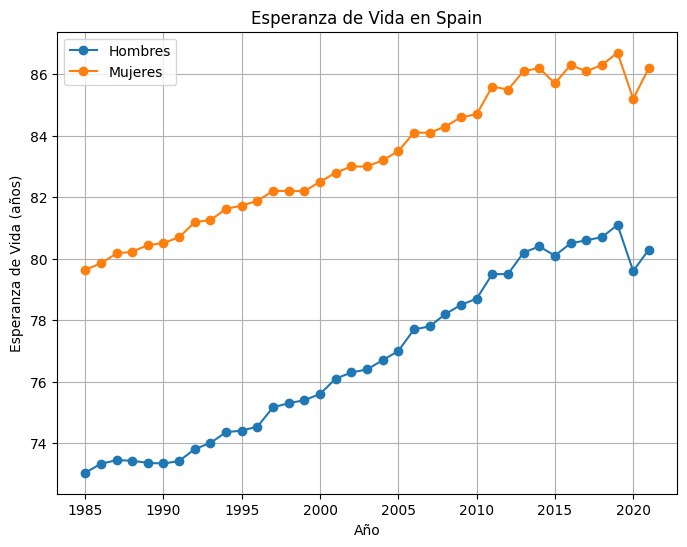

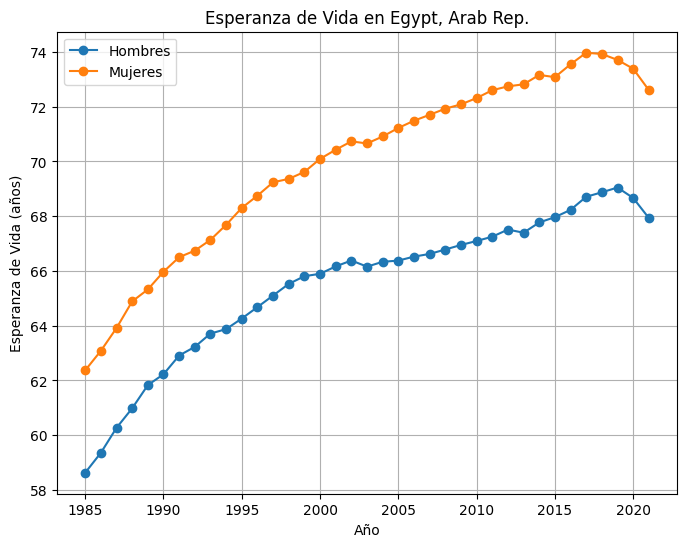

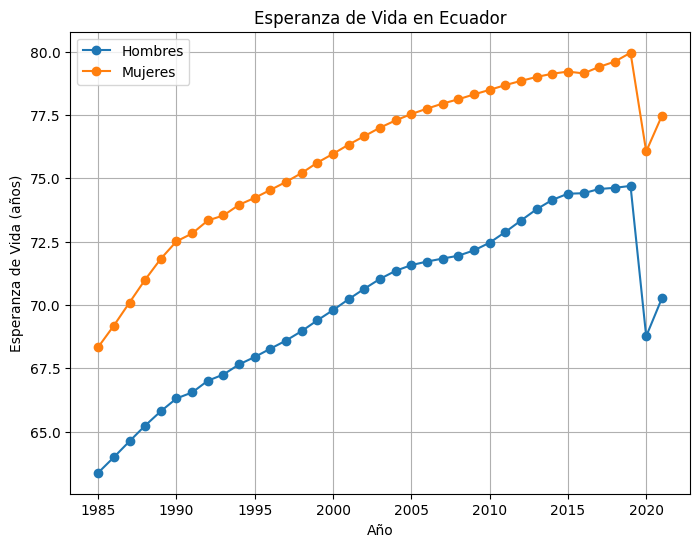

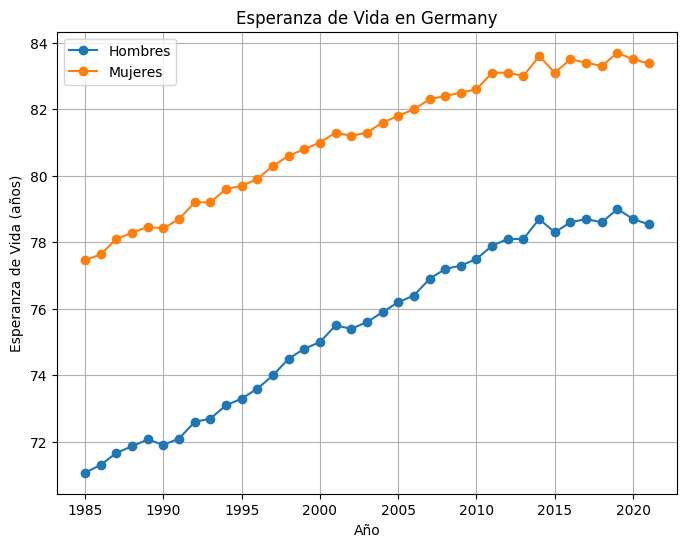

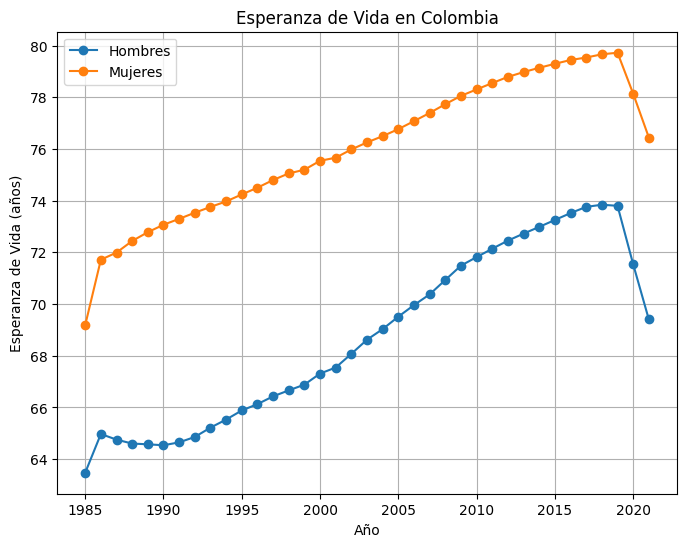

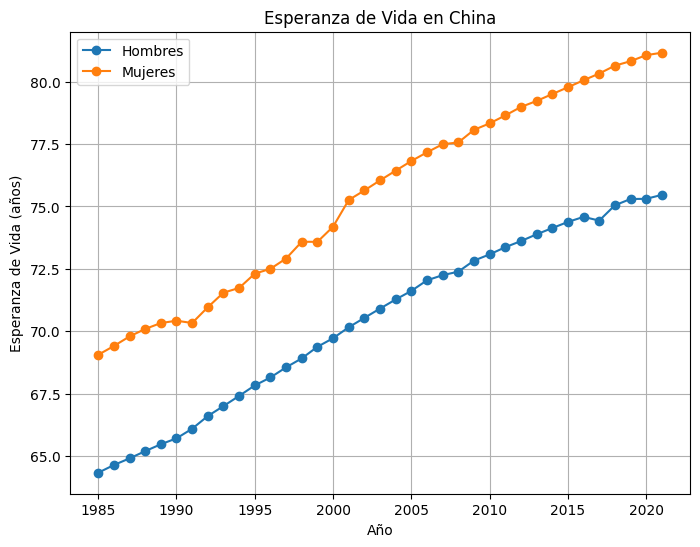

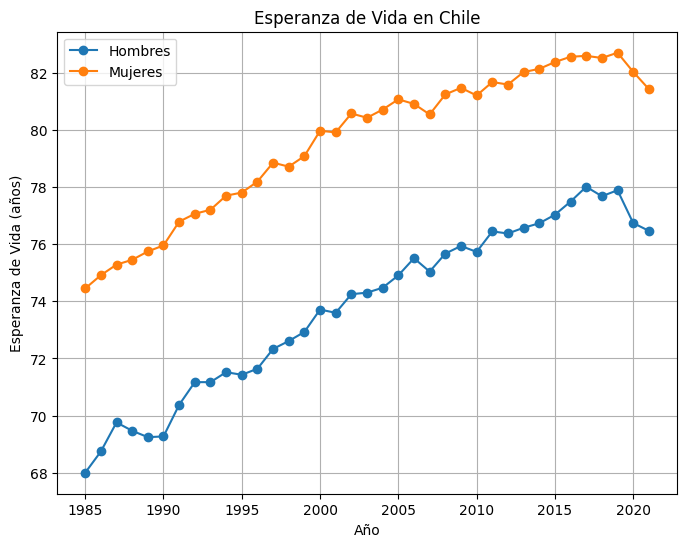

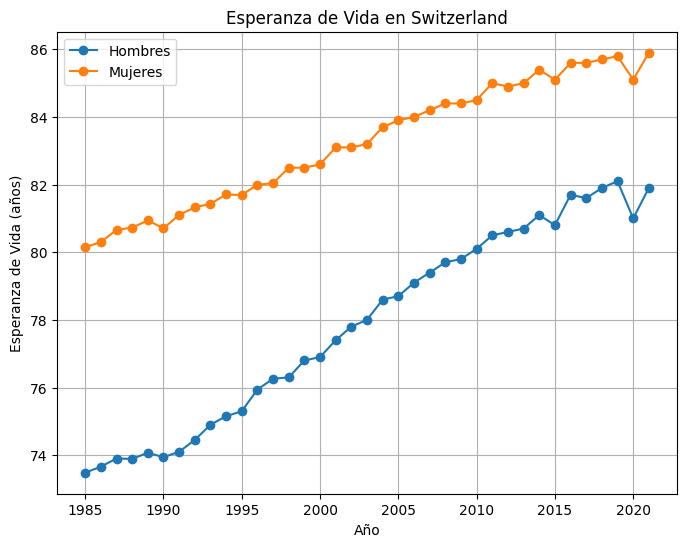

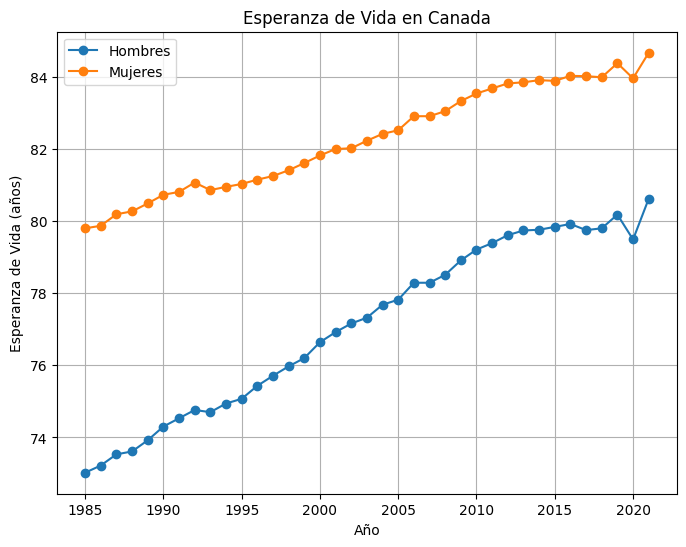

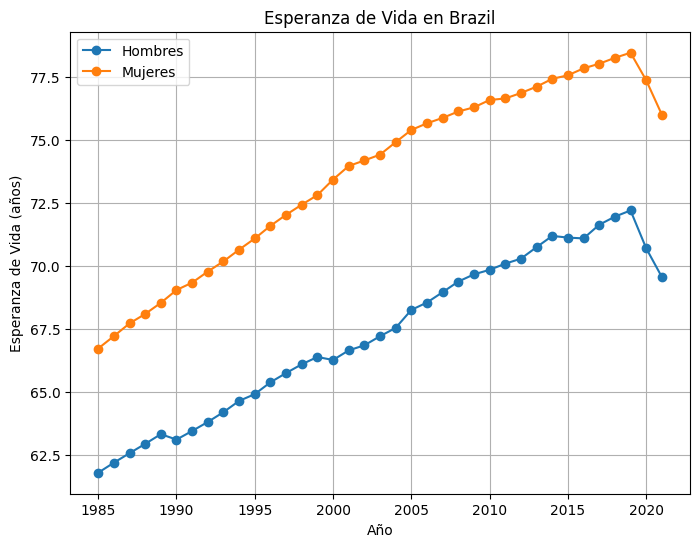

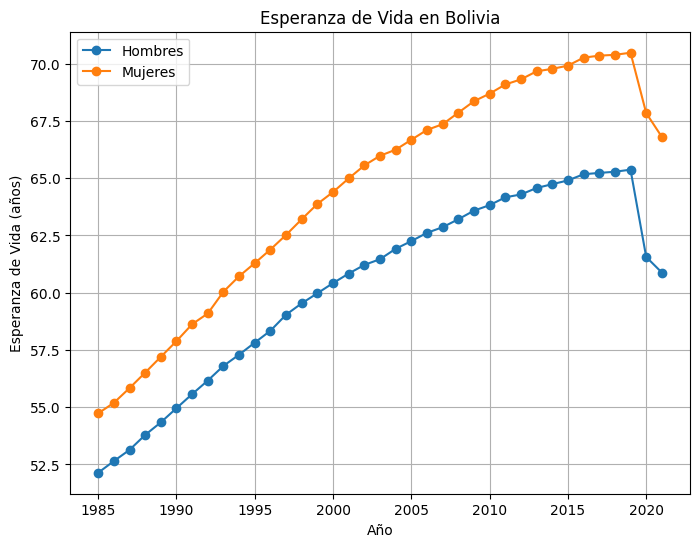

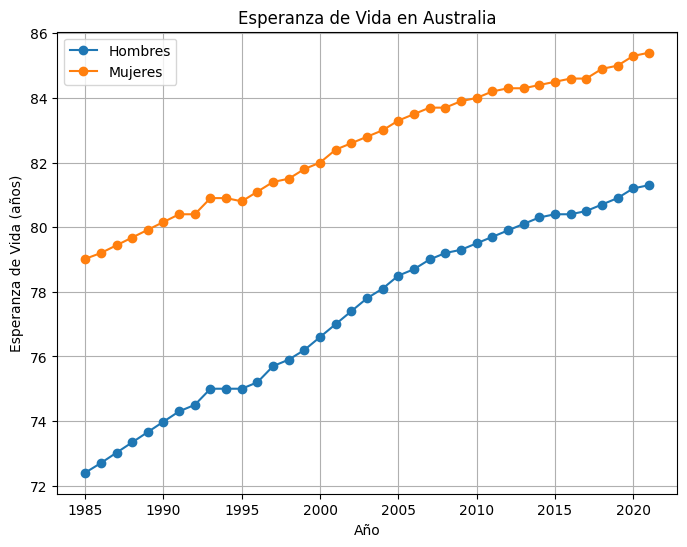

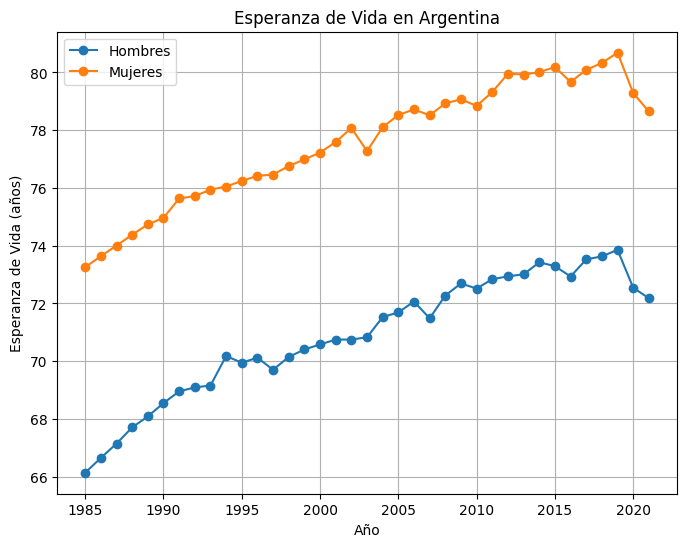

In [94]:
paises = df['full name'].unique()

# se itera a traves de cada país y crear un gráfico de líneas separado por pais
for pais in paises:
    datos_pais = df[df['full name'] == pais]
    
    plt.figure(figsize=(8, 6))
    plt.plot(datos_pais['year'], datos_pais['Life expectancy at birth, male (years)'], label='Hombres', marker='o')
    plt.plot(datos_pais['year'], datos_pais['Life expectancy at birth, female (years)'], label='Mujeres', marker='o')
    
    plt.xlabel('Año')
    plt.ylabel('Esperanza de Vida (años)')
    plt.title(f'Esperanza de Vida en {pais}')
    plt.legend() 
    plt.grid(True)
    plt.show()


De nuevo graficando la esperanza de vida pero esta vez introduciendo los graficos en una matriz de 7x5 para tener una visualizacion mas compacta

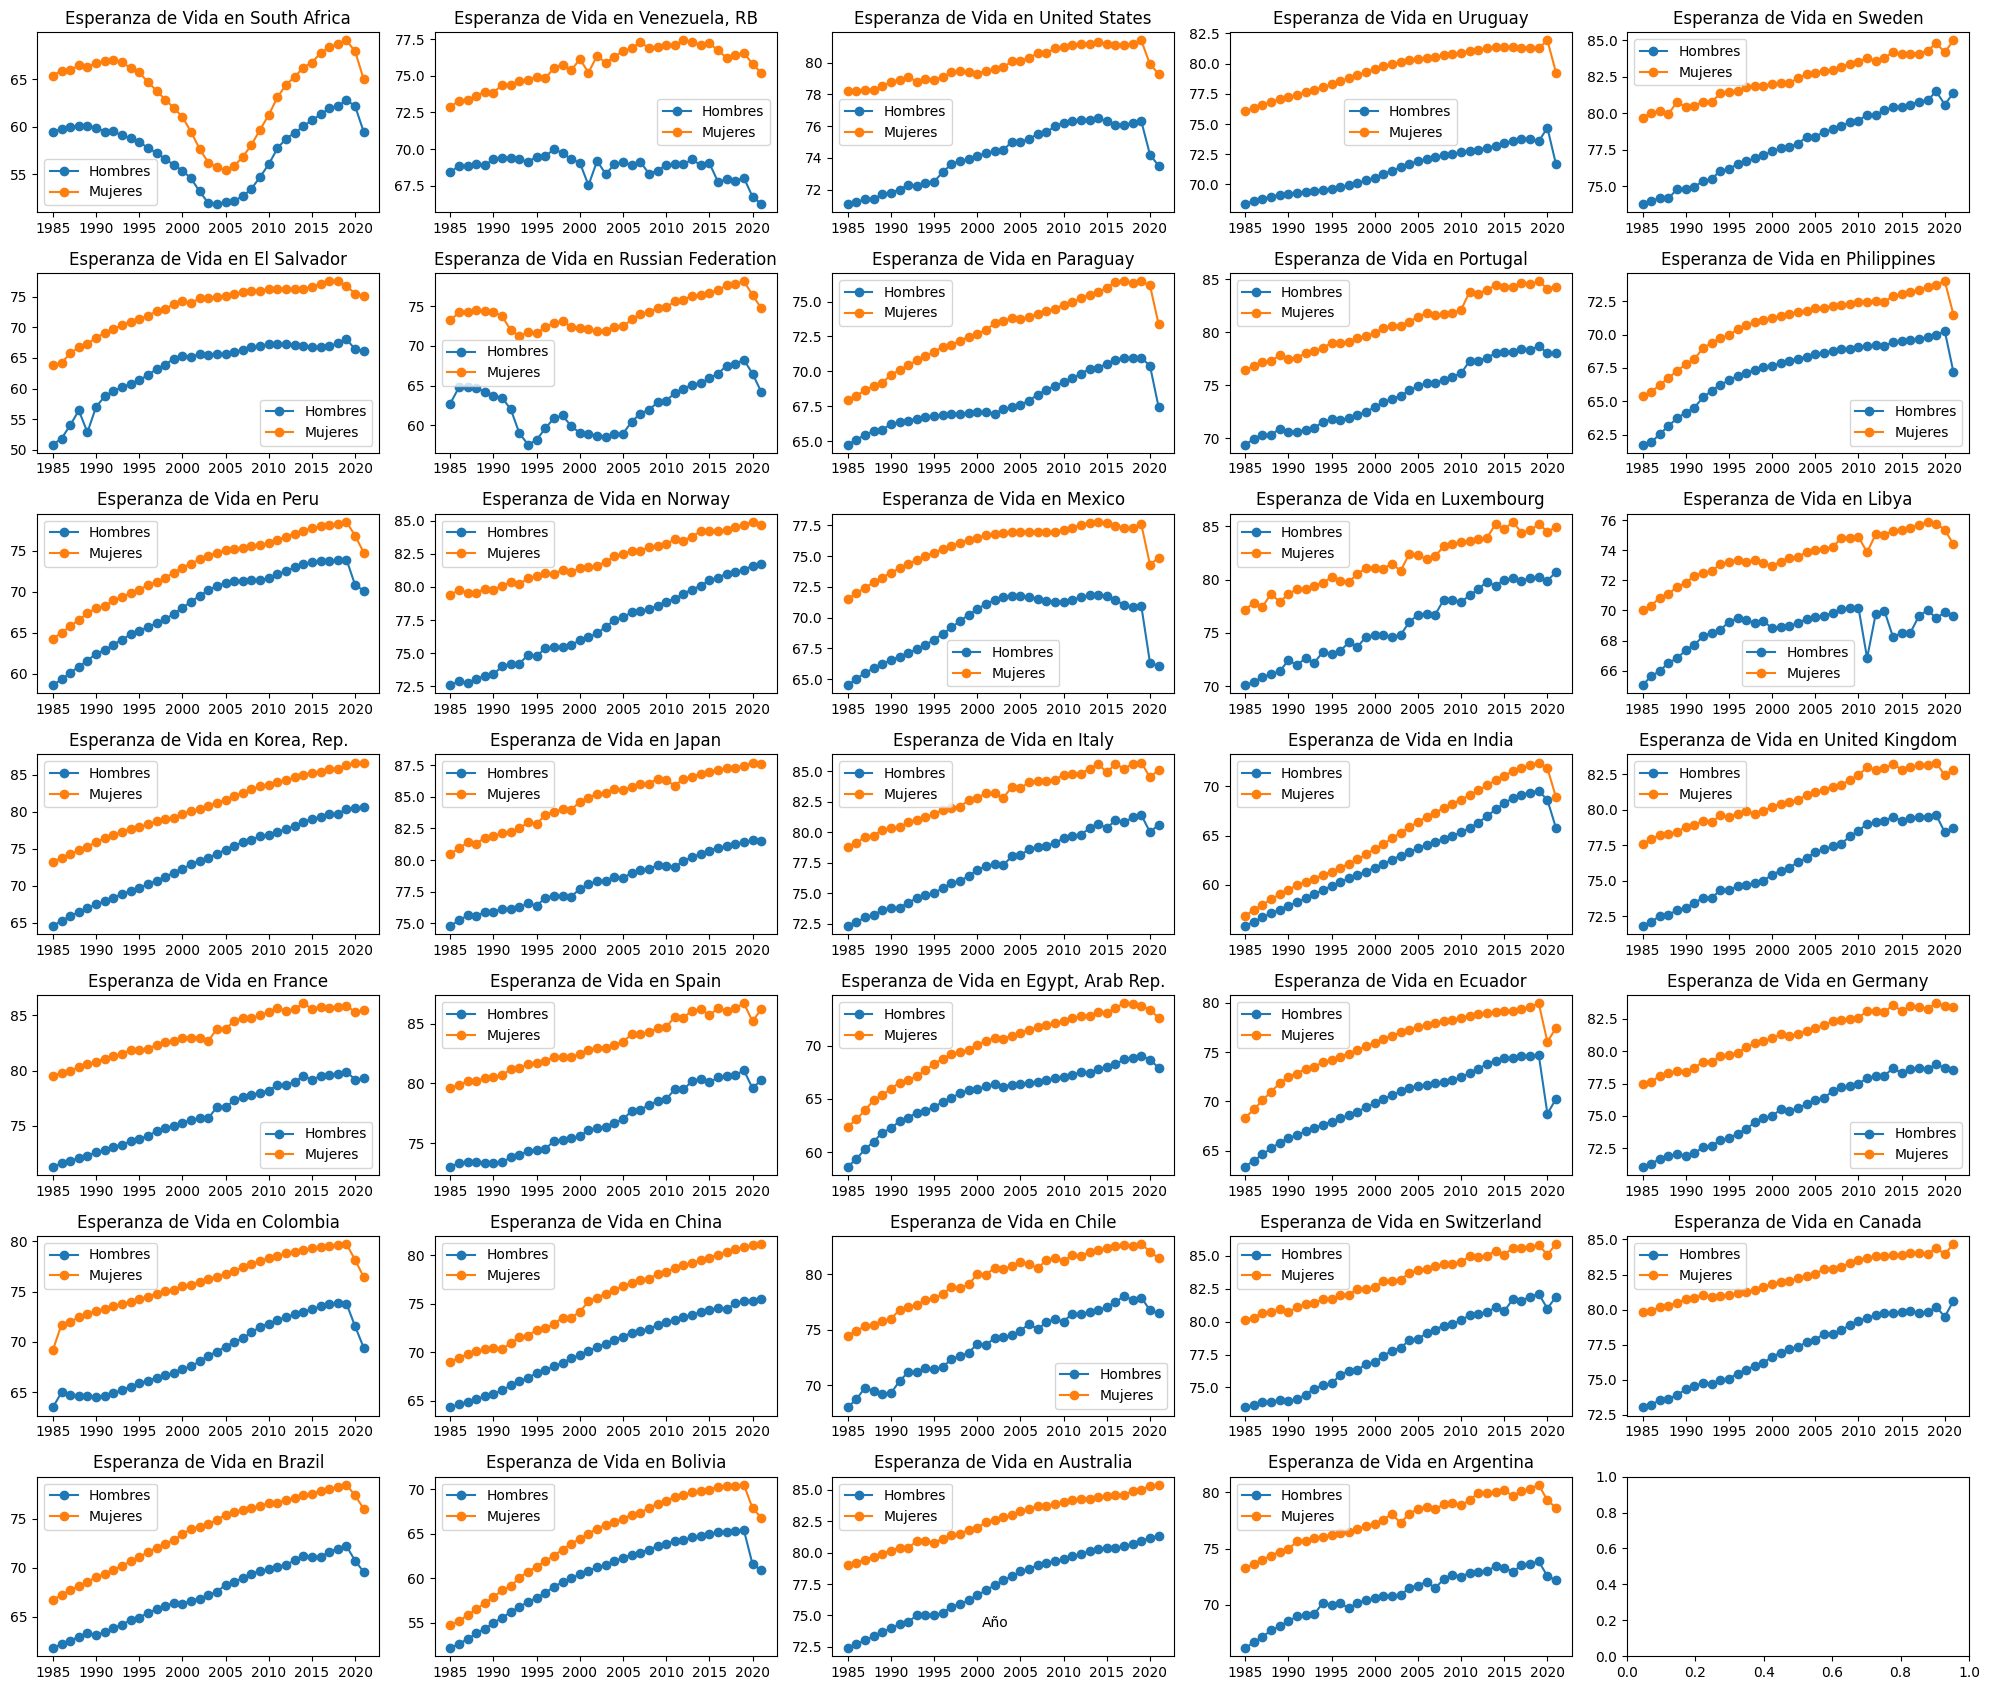

In [96]:
num_filas = 7
num_columnas = 5
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 17))

# se itera por cada pais para crear su respectivo grafico de linea
for i, pais in enumerate(paises):
    datos_pais = df[df['full name'] == pais]
    fila = i // num_columnas
    columna = i % num_columnas
    ax = axes[fila, columna]
    ax.plot(datos_pais['year'], datos_pais['Life expectancy at birth, male (years)'], label='Hombres', marker='o')
    ax.plot(datos_pais['year'], datos_pais['Life expectancy at birth, female (years)'], label='Mujeres', marker='o')
    ax.set_title(f'Esperanza de Vida en {pais}')
    ax.legend()
    
fig.text(0.5, 0.04, 'Año', ha='center')
plt.tight_layout()
plt.savefig("esperanza de vida matriz.jpg")
plt.show()


Graficando la mortalidad por accidentes de tráfico, promedio por 100 mil habitantes

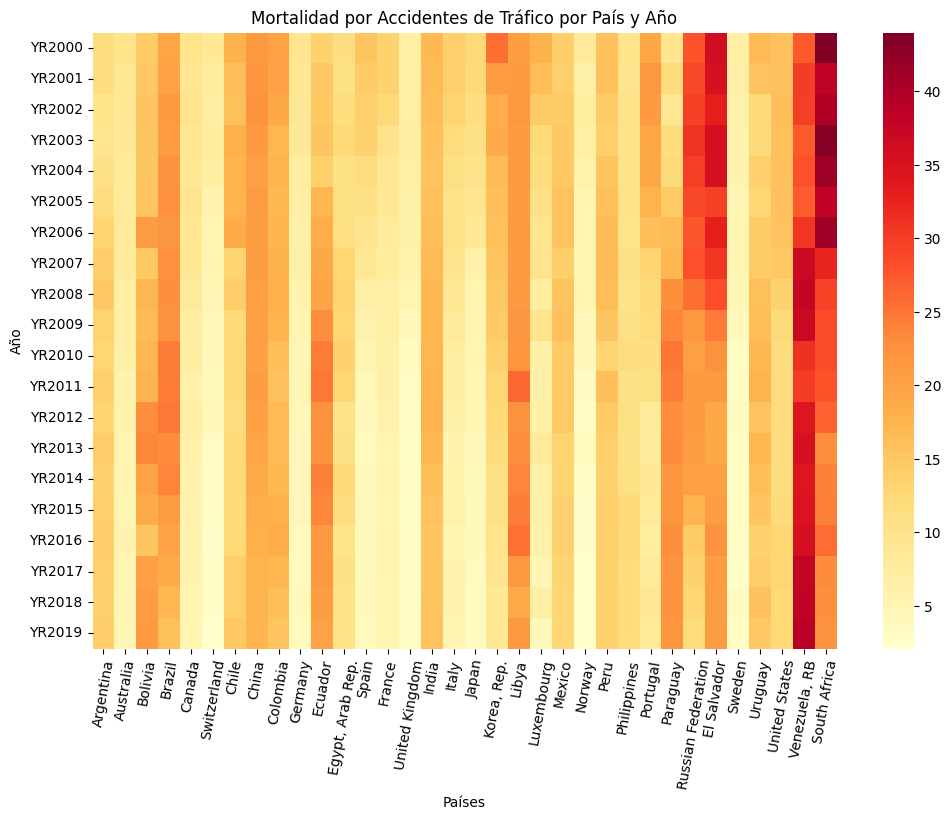

In [69]:
data_transpuesta = mortalidad.set_index('full name').T

plt.figure(figsize=(12, 8))
sns.heatmap(data_transpuesta, cmap='YlOrRd', cbar=True)
plt.xlabel('Países')
plt.ylabel('Año')
plt.title('Mortalidad por Accidentes de Tráfico por País y Año')

plt.xticks(rotation=80)
plt.savefig("mapa accidentes de trafico.jpg", bbox_inches='tight') 
plt.show()

Porcentaje de crecimiento de poblacion anual 

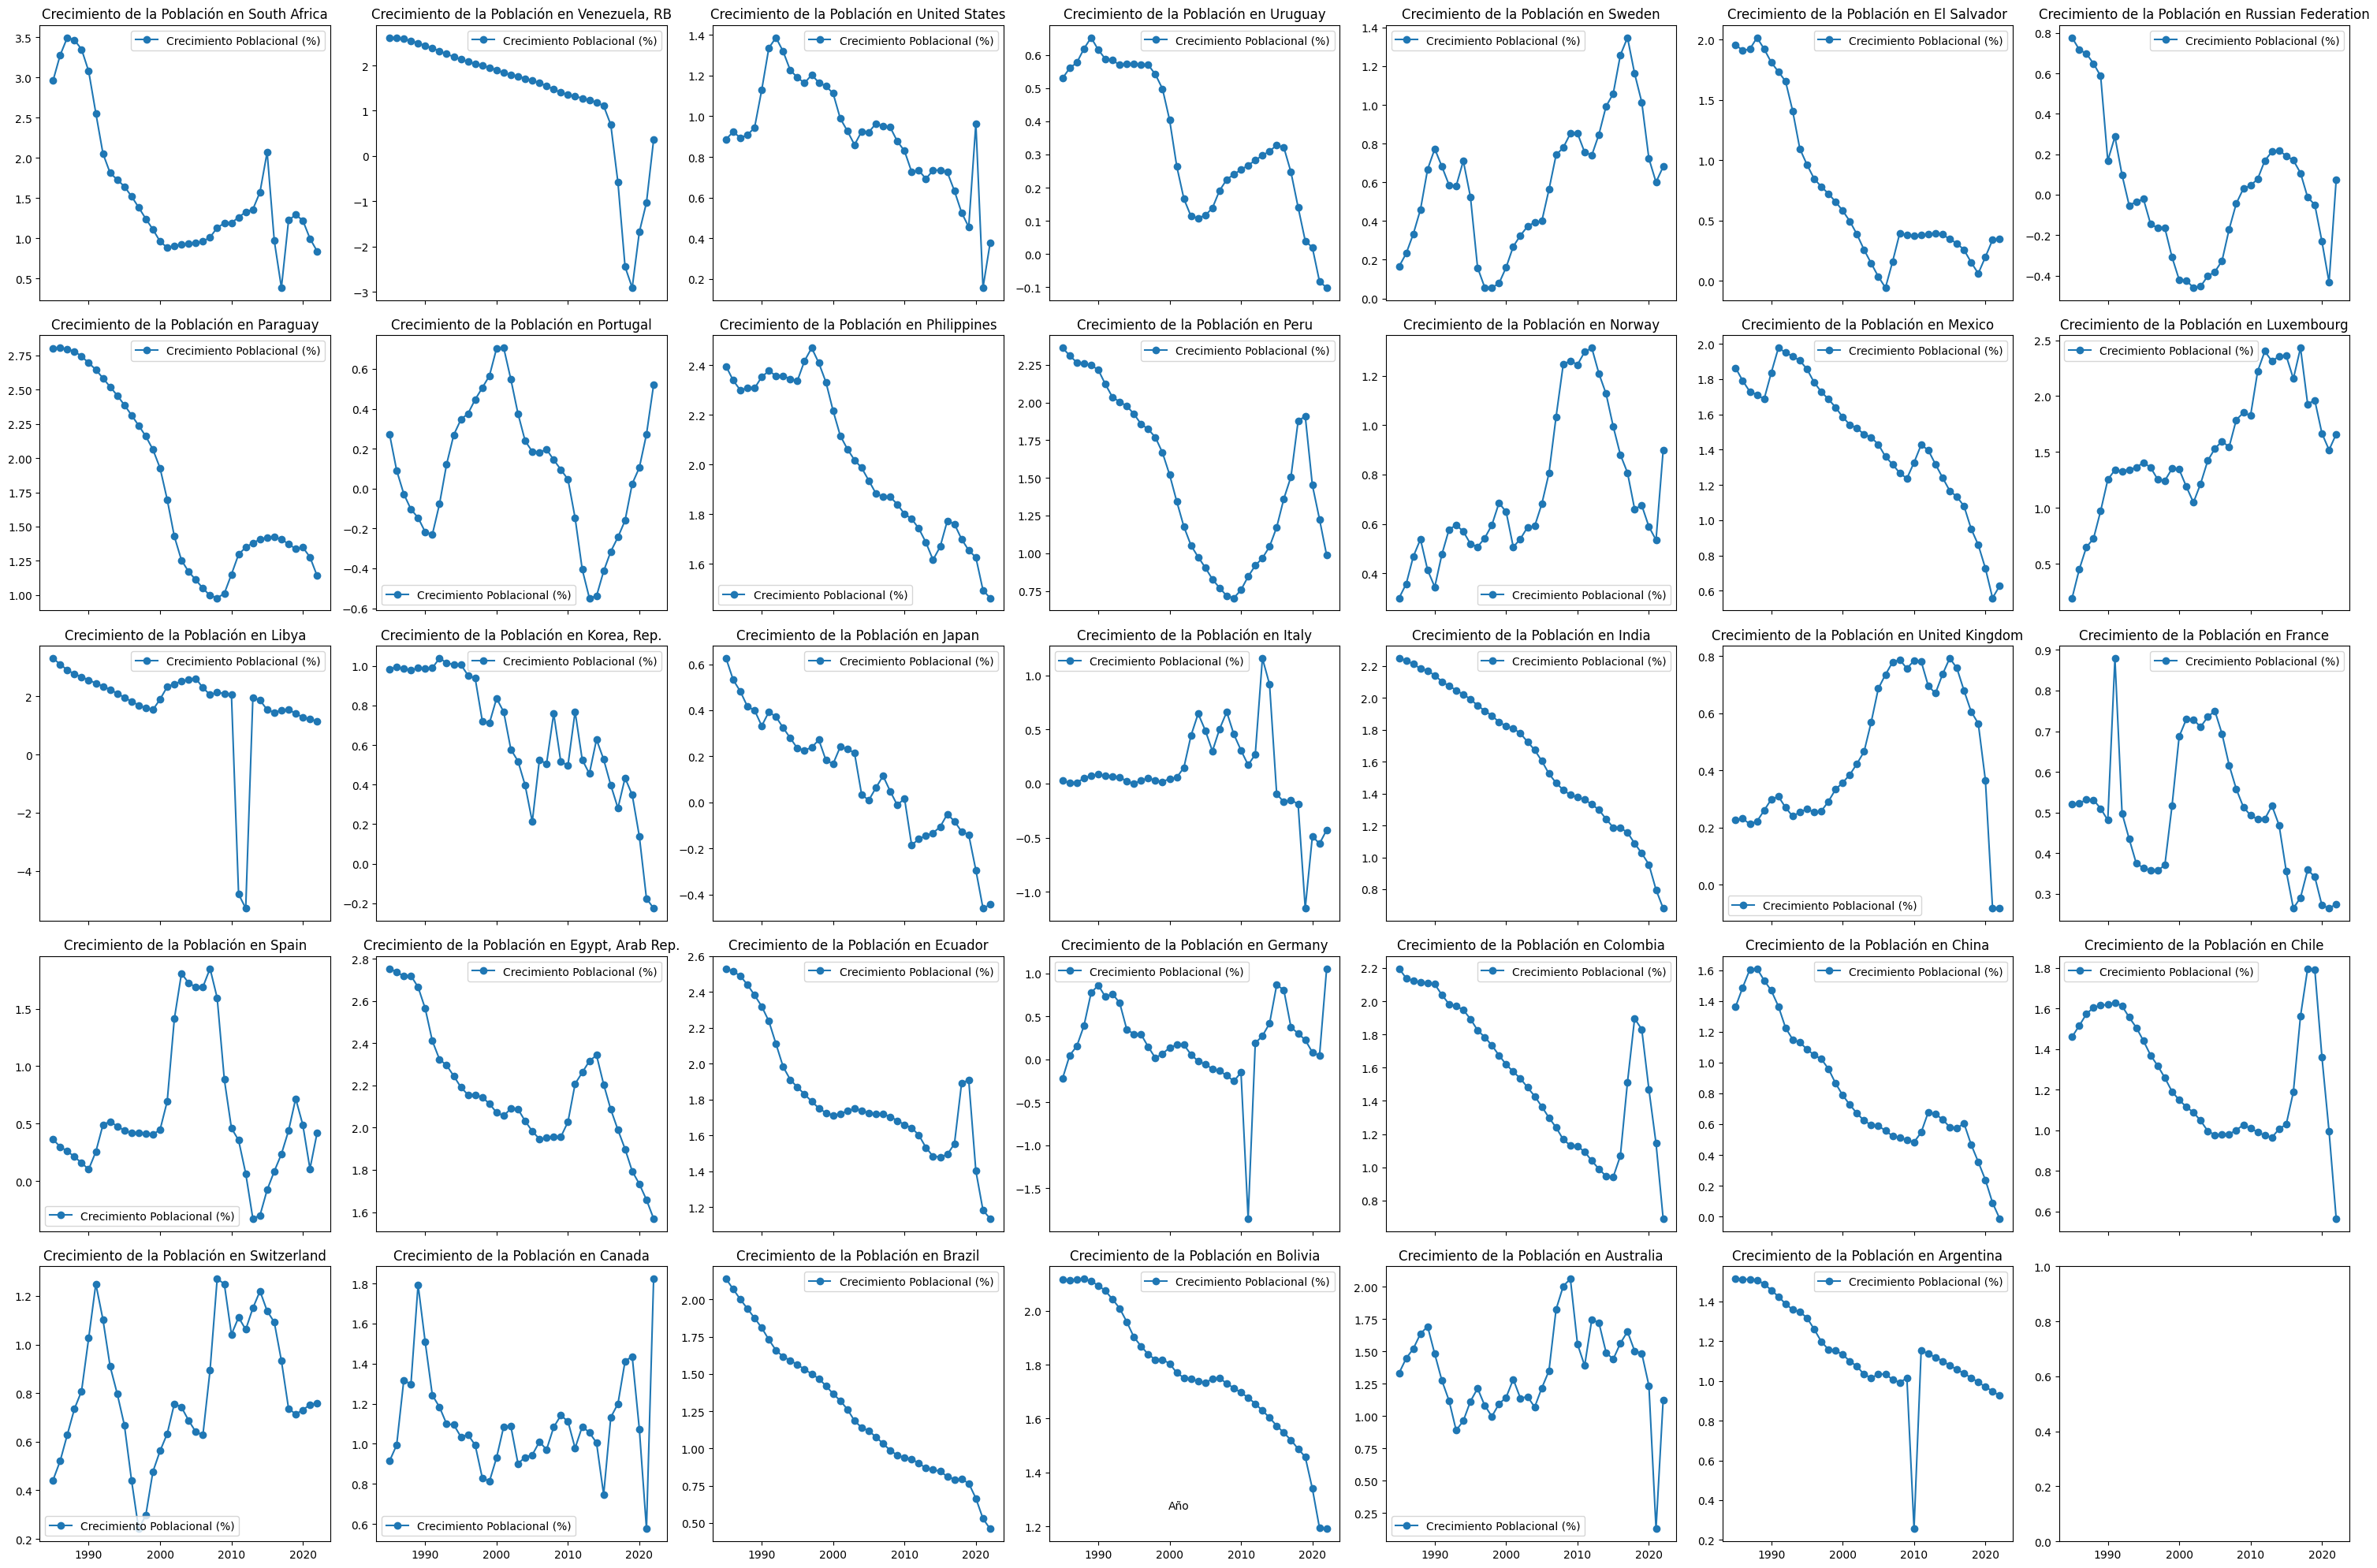

In [76]:
paises = df['full name'].unique()

num_filas = 5  
num_columnas = 7  

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(30, 20), sharex=True)

for i, pais in enumerate(paises):
    fila = i // num_columnas
    columna = i % num_columnas
    datos_pais = df[df['full name'] == pais]
    axes[fila, columna].plot(datos_pais['year'], datos_pais['Population growth (annual %)'], label='Crecimiento Poblacional (%)', marker='o')
    axes[fila, columna].set_title(f'Crecimiento de la Población en {pais}')
    axes[fila, columna].legend()
    
fig.text(0.5, 0.04, 'Año', ha='center')
plt.tight_layout()
plt.savefig("crecimiento poblacion.jpg", bbox_inches='tight') 
plt.show()

Acceso electricidad

ValueError: bottom cannot be >= top

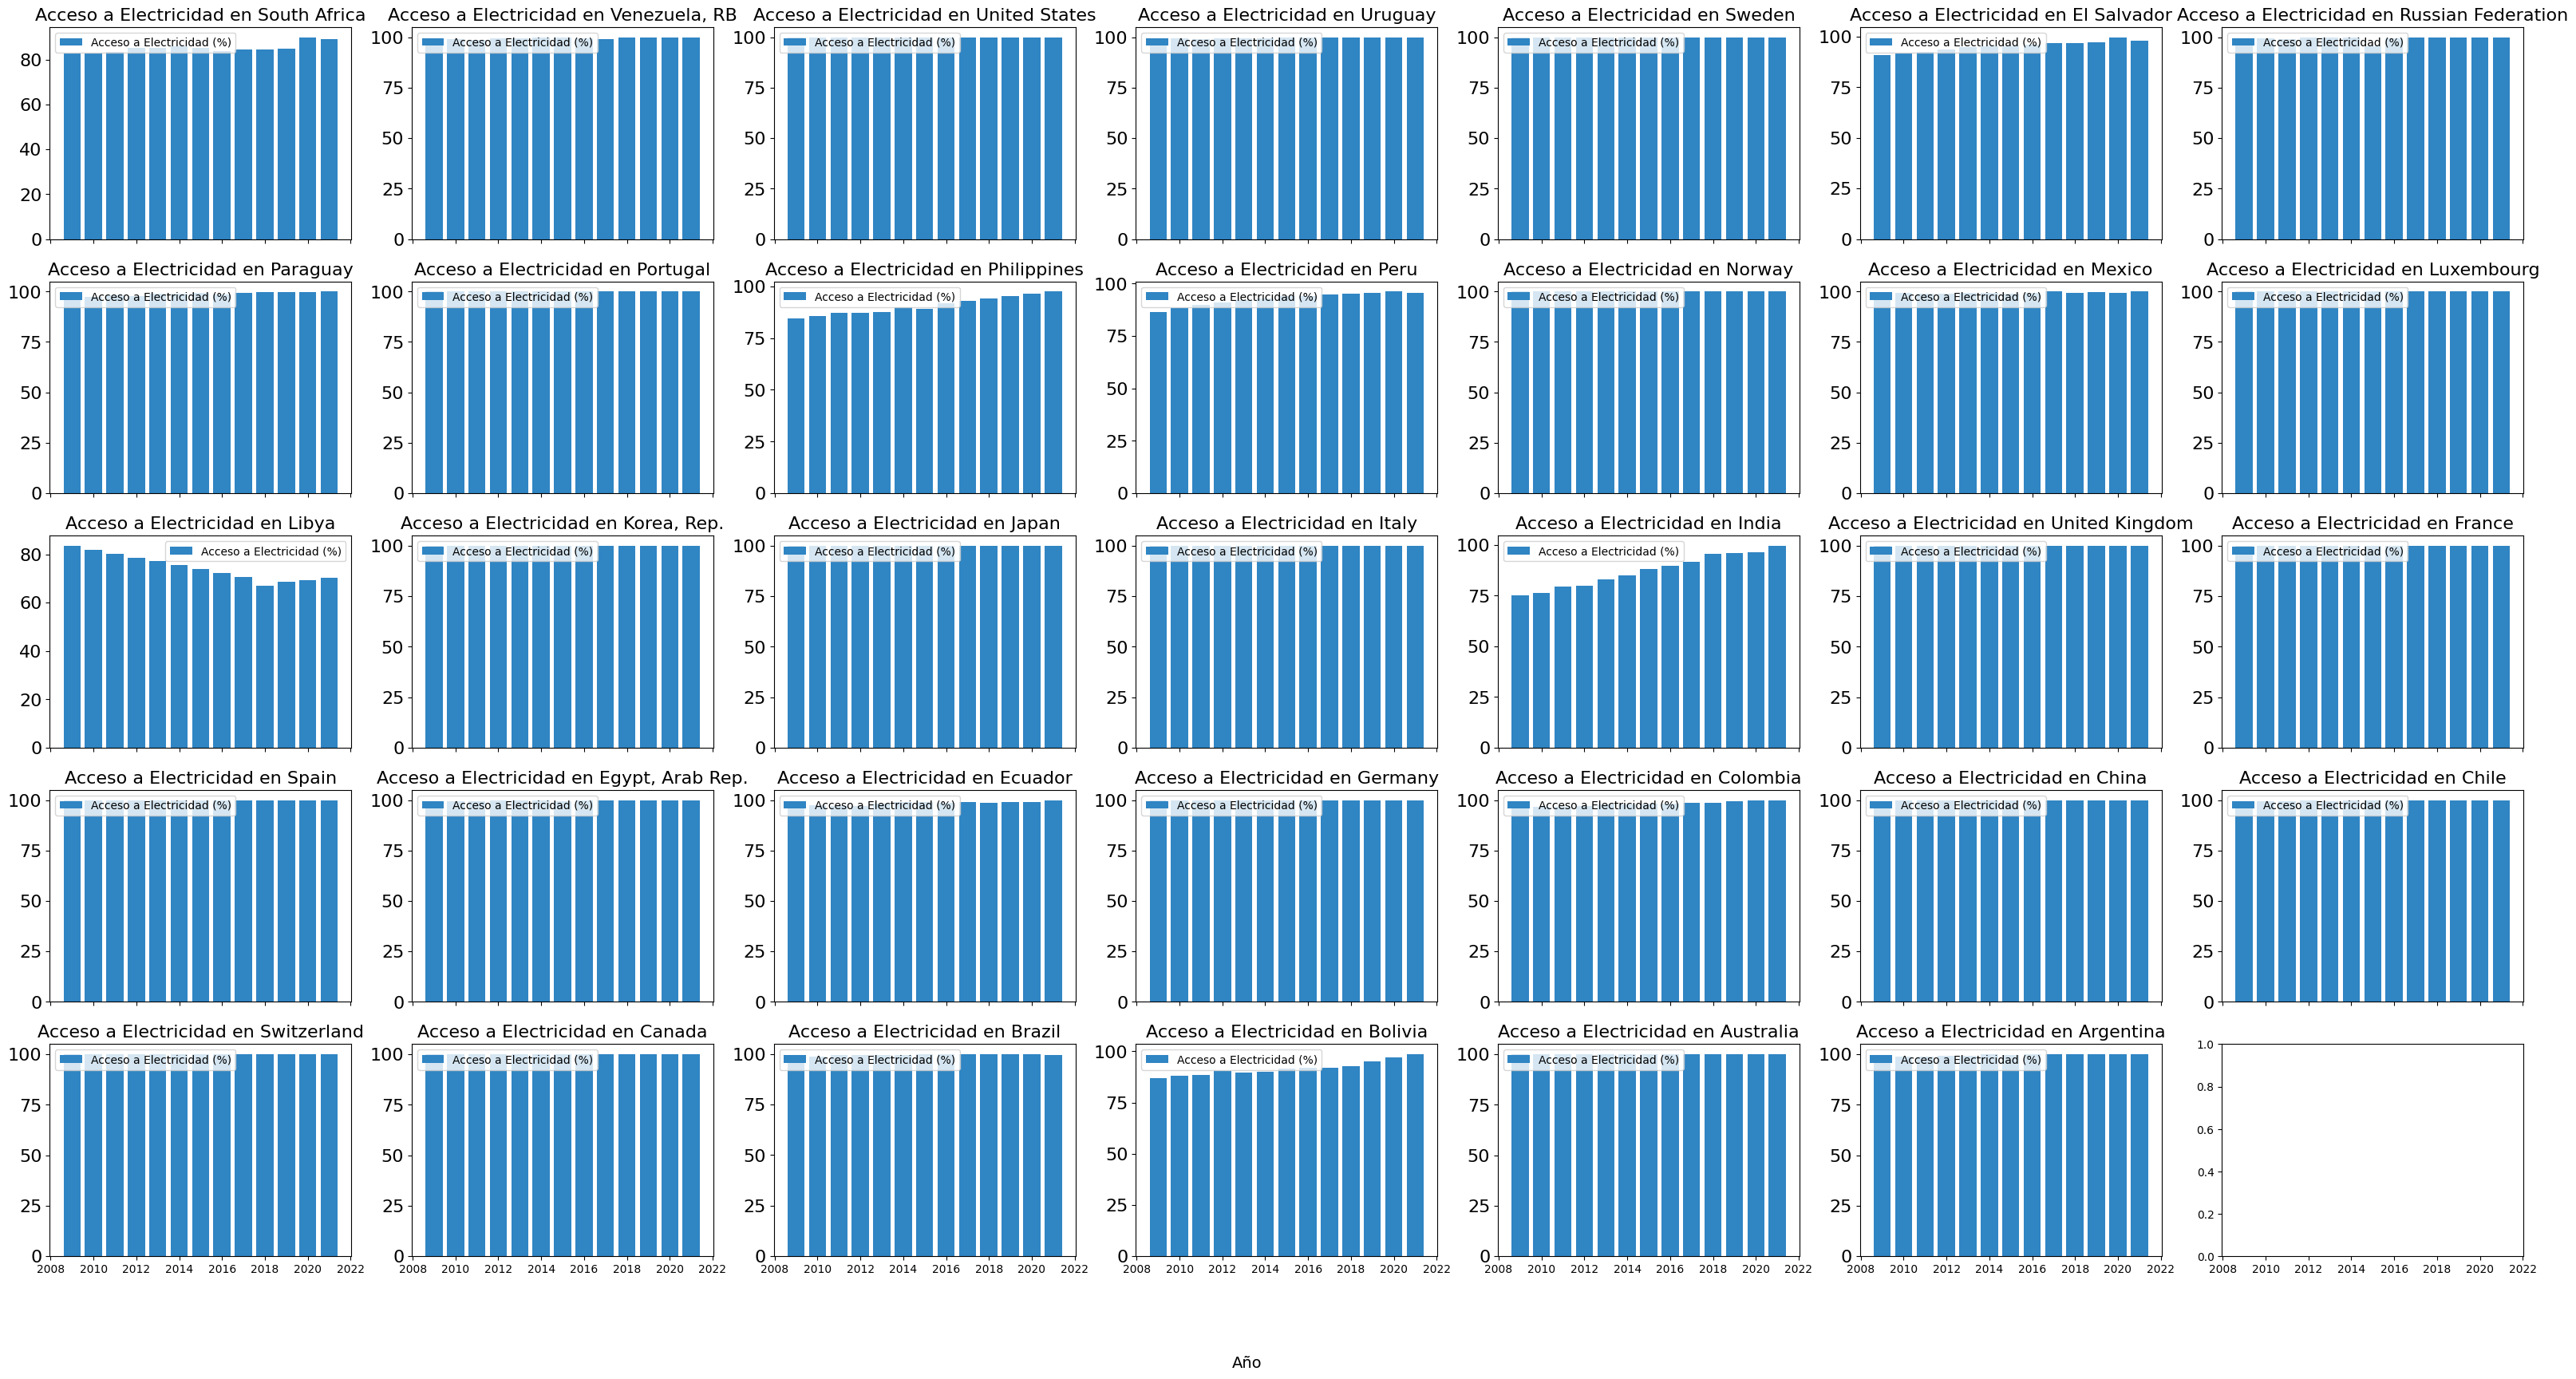

In [100]:
# filtro los datos para incluir solo los últimos 13 años
ultimos_anios = df[df['year'] >= (df['year'].max() - 13)]
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(40, 20), sharex=True)
for i, pais in enumerate(paises):
    fila = i // num_columnas
    columna = i % num_columnas
    datos_pais = ultimos_anios[ultimos_anios['full name'] == pais]

    axes[fila, columna].bar(datos_pais['year'], datos_pais['Access to electricity (% of population)'], color='#3085C3', label='Acceso a Electricidad (%)')
    
    axes[fila, columna].set_title(f'Acceso a Electricidad en {pais}', fontsize=16)
    axes[fila, columna].legend()
    axes[fila, columna].tick_params(axis='y', labelsize=16)
    
fig.text(0.5, 0.04, 'Año', ha='center', fontsize=14) 
plt.subplots_adjust(bottom=0.9)
plt.tight_layout()
plt.savefig("acceso a electricidad 2.jpg", bbox_inches='tight') 
plt.show()


Porcentaje de la poblacion con acceso a educacion universitaria

ValueError: bottom cannot be >= top

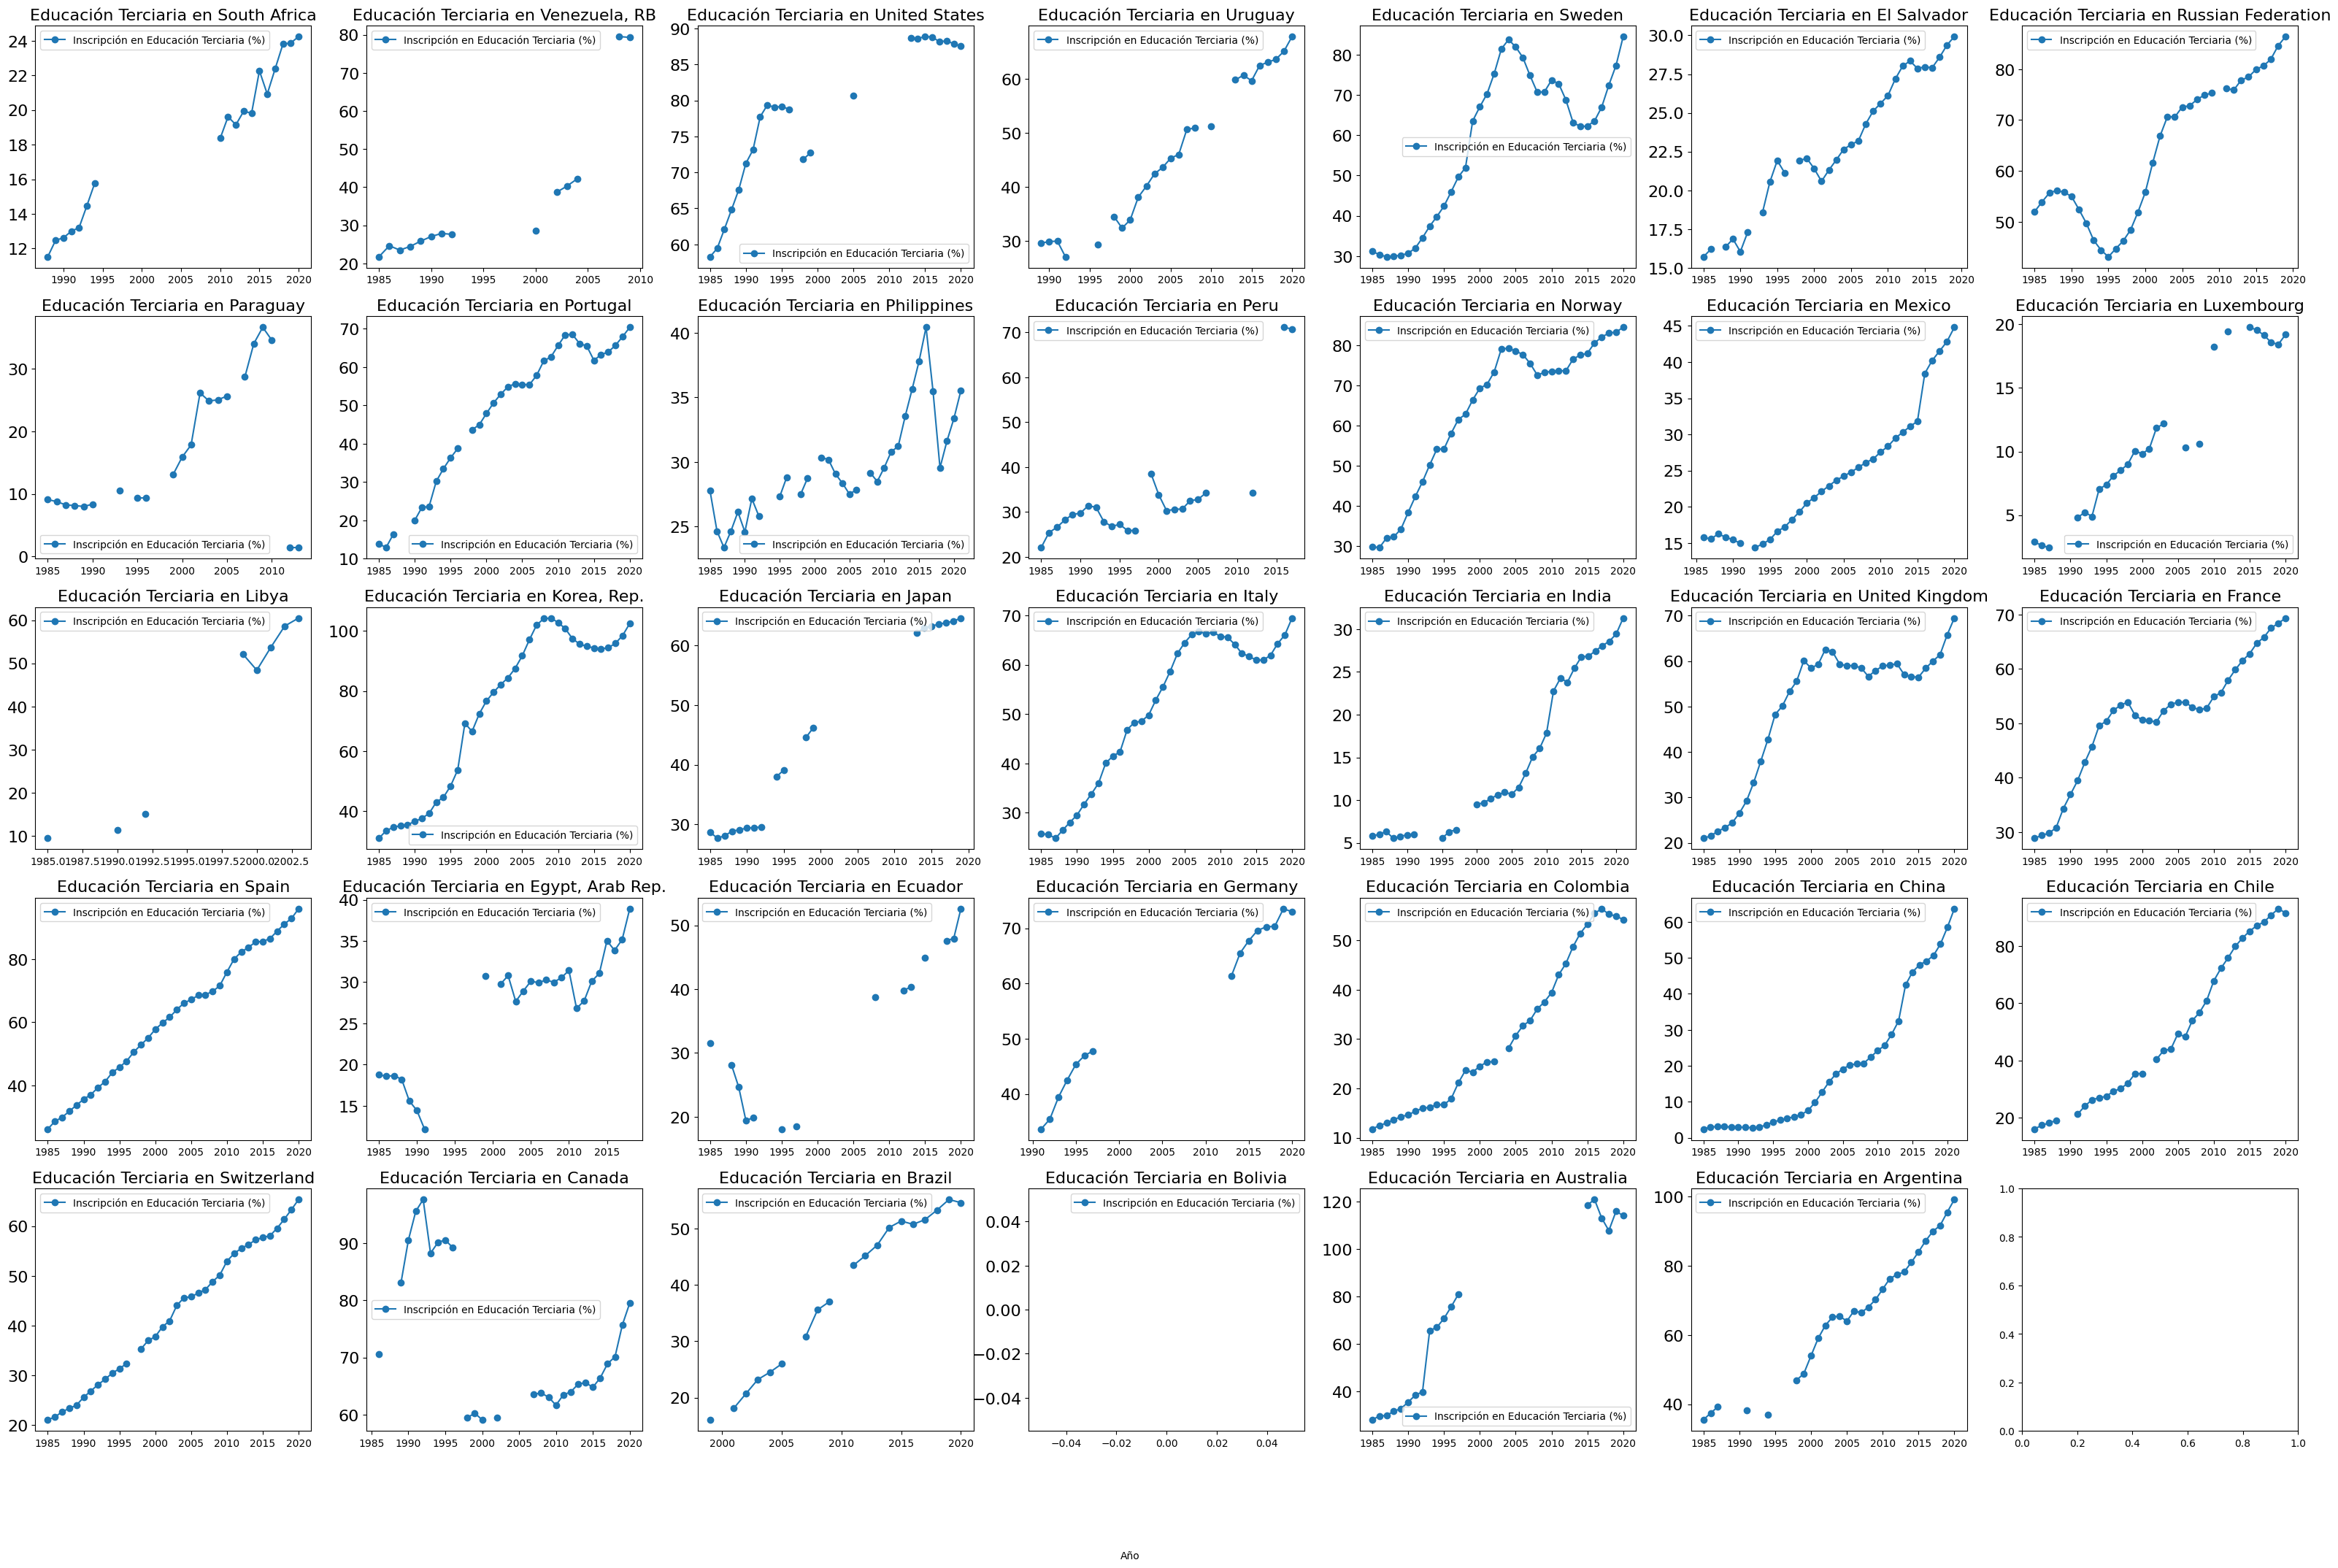

In [101]:
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(40, 25))
for i, pais in enumerate(paises):
    fila = i // num_columnas
    columna = i % num_columnas
    datos_pais = df[df['full name'] == pais]
    axes[fila, columna].plot(datos_pais['year'], datos_pais['School enrollment, tertiary (% gross)'], label='Inscripción en Educación Terciaria (%)', marker='o')
    axes[fila, columna].set_title(f'Educación Terciaria en {pais}', fontsize = 16)
    axes[fila, columna].legend()
    axes[fila, columna].tick_params(axis='y', labelsize=16)
fig.text(0.5, 0.04, 'Año', ha='center')
plt.subplots_adjust(bottom=0.9)
plt.tight_layout()
plt.show()

PIB per capita:

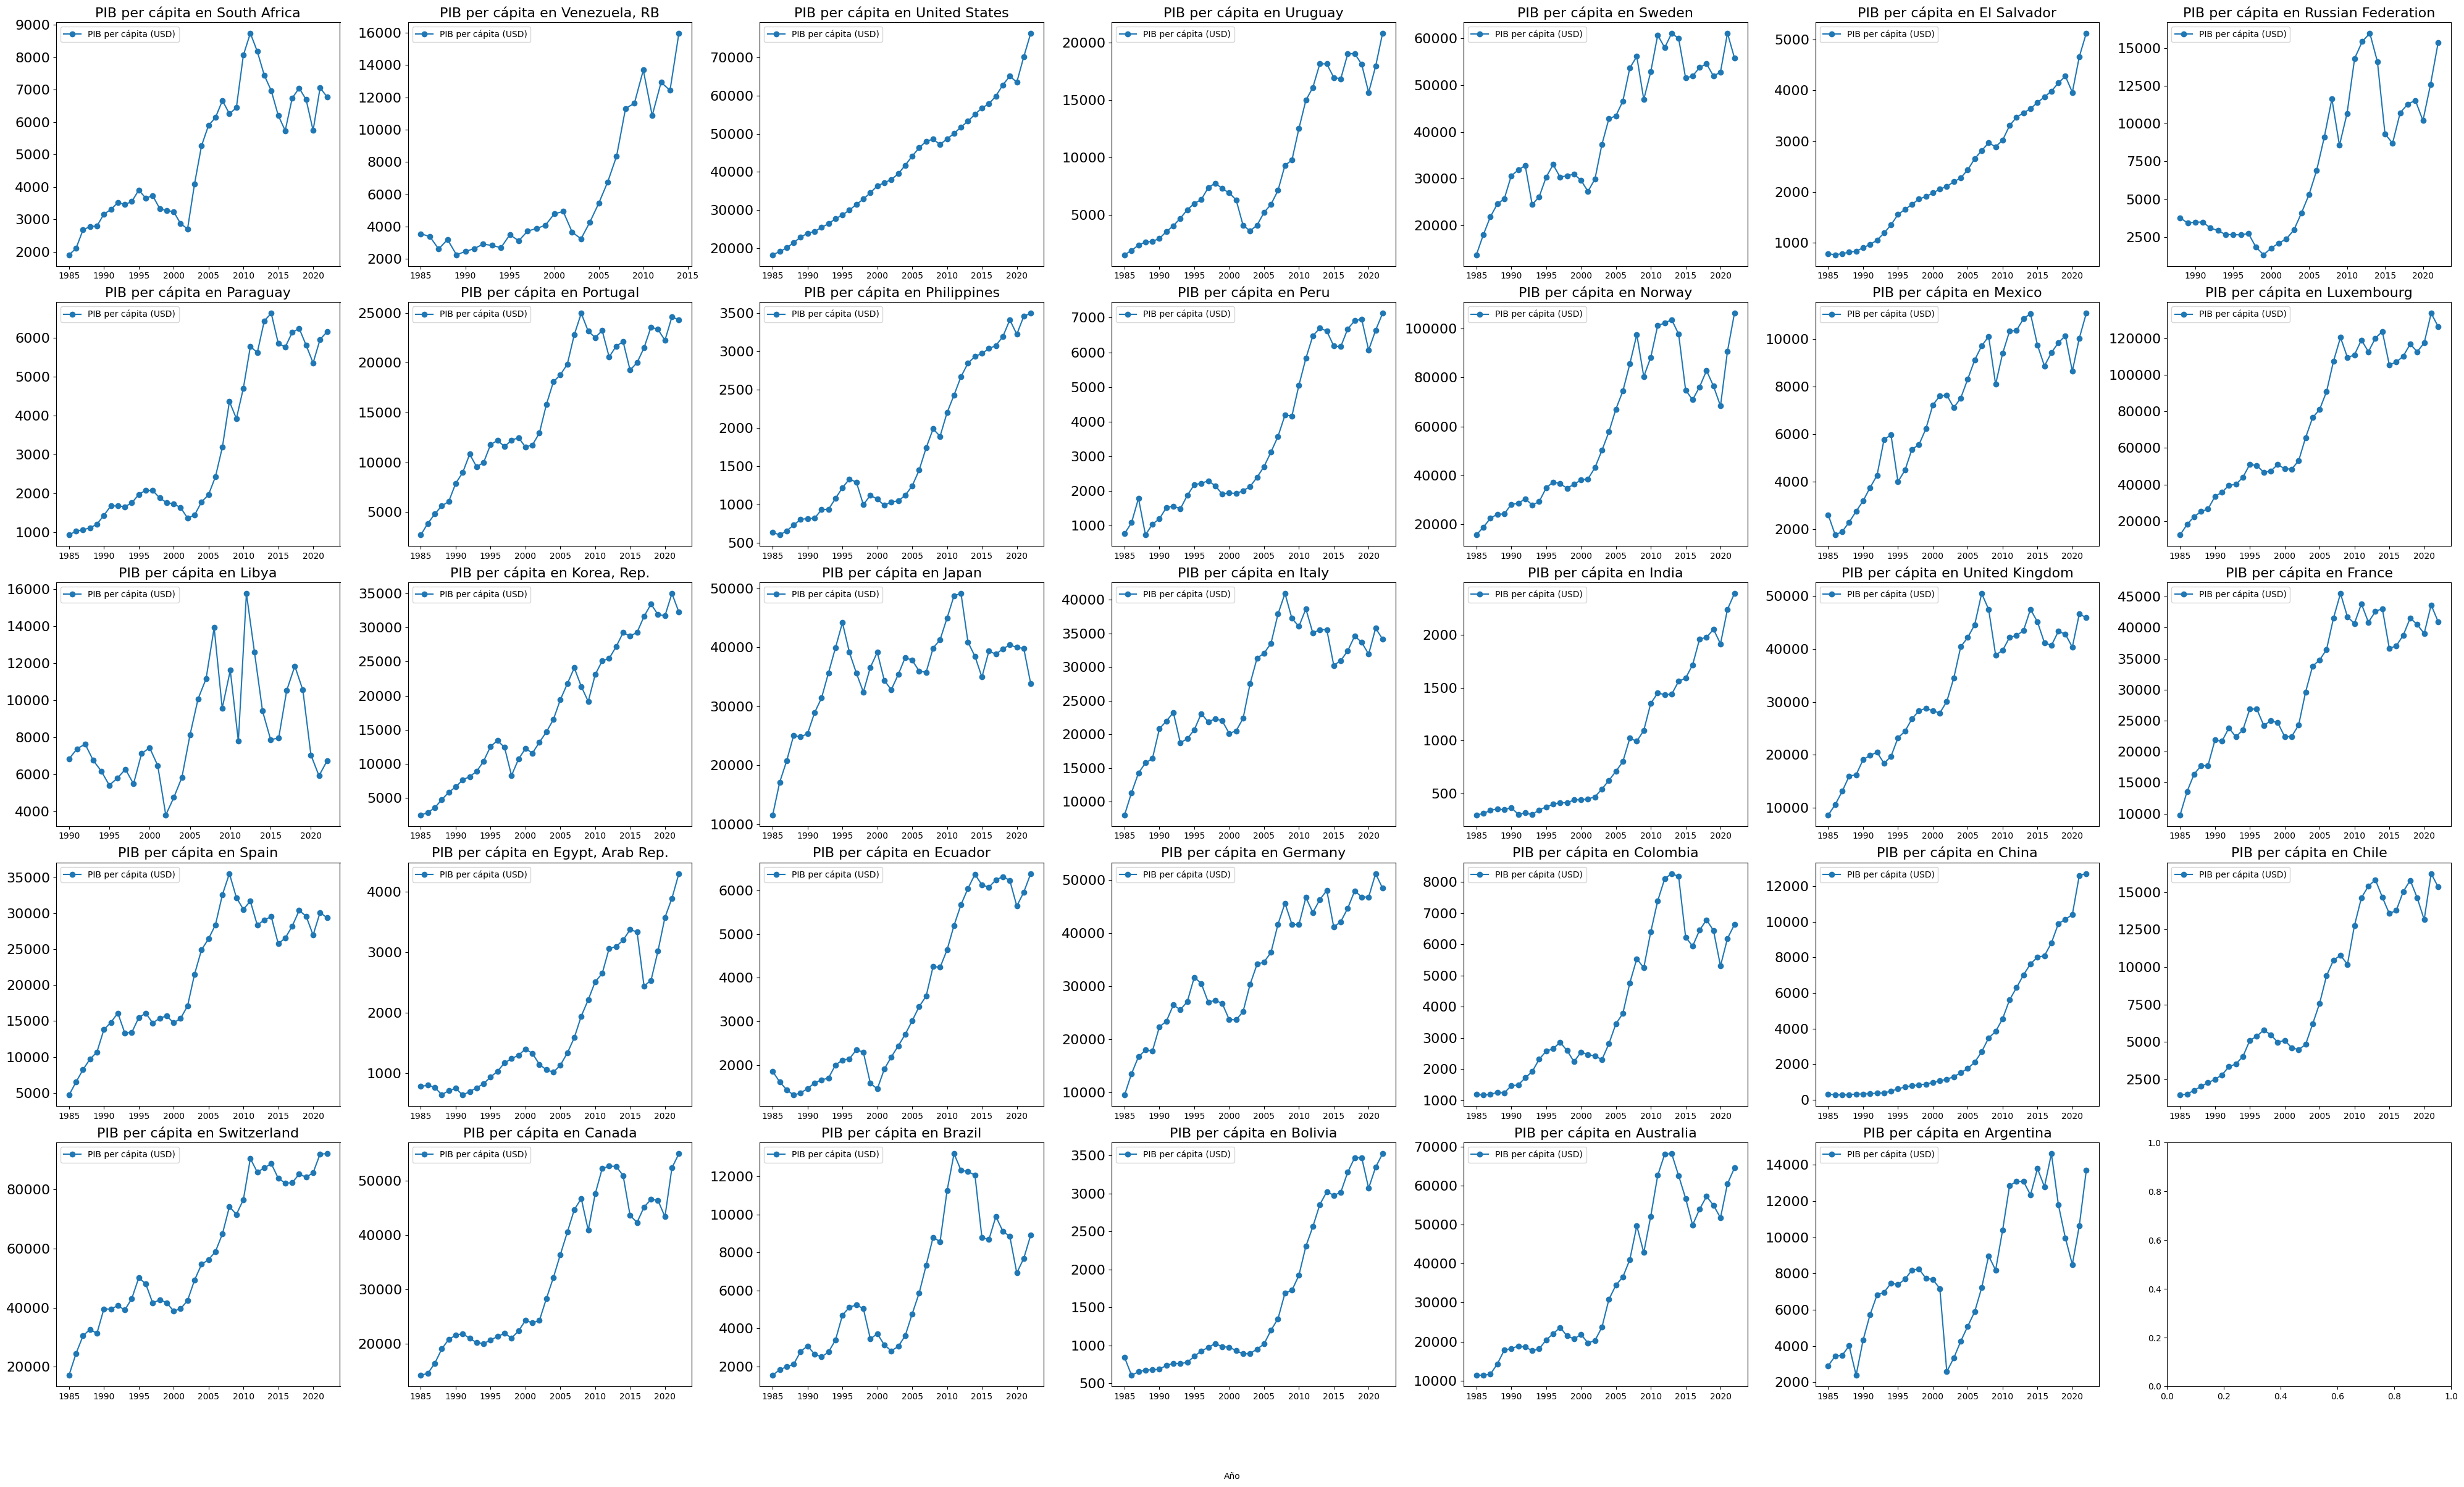

In [102]:
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(40, 25))

for i, pais in enumerate(paises):
    fila = i // num_columnas
    columna = i % num_columnas

    datos_pais = df[df['full name'] == pais]
    
    axes[fila, columna].plot(datos_pais['year'], datos_pais['GDP per capita (current US$)'], label='PIB per cápita (USD)', marker='o')
    axes[fila, columna].set_title(f'PIB per cápita en {pais}', fontsize= 16)
    axes[fila, columna].legend()
    axes[fila, columna].tick_params(axis='y', labelsize=16)

fig.text(0.5, 0.04, 'Año', ha='center')
    
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

inflacion anual, porcentaje anual de incrementeo o decremento en el costo de necesidades basicas de un ciudadano (Alimentos, medicinas, servicios)

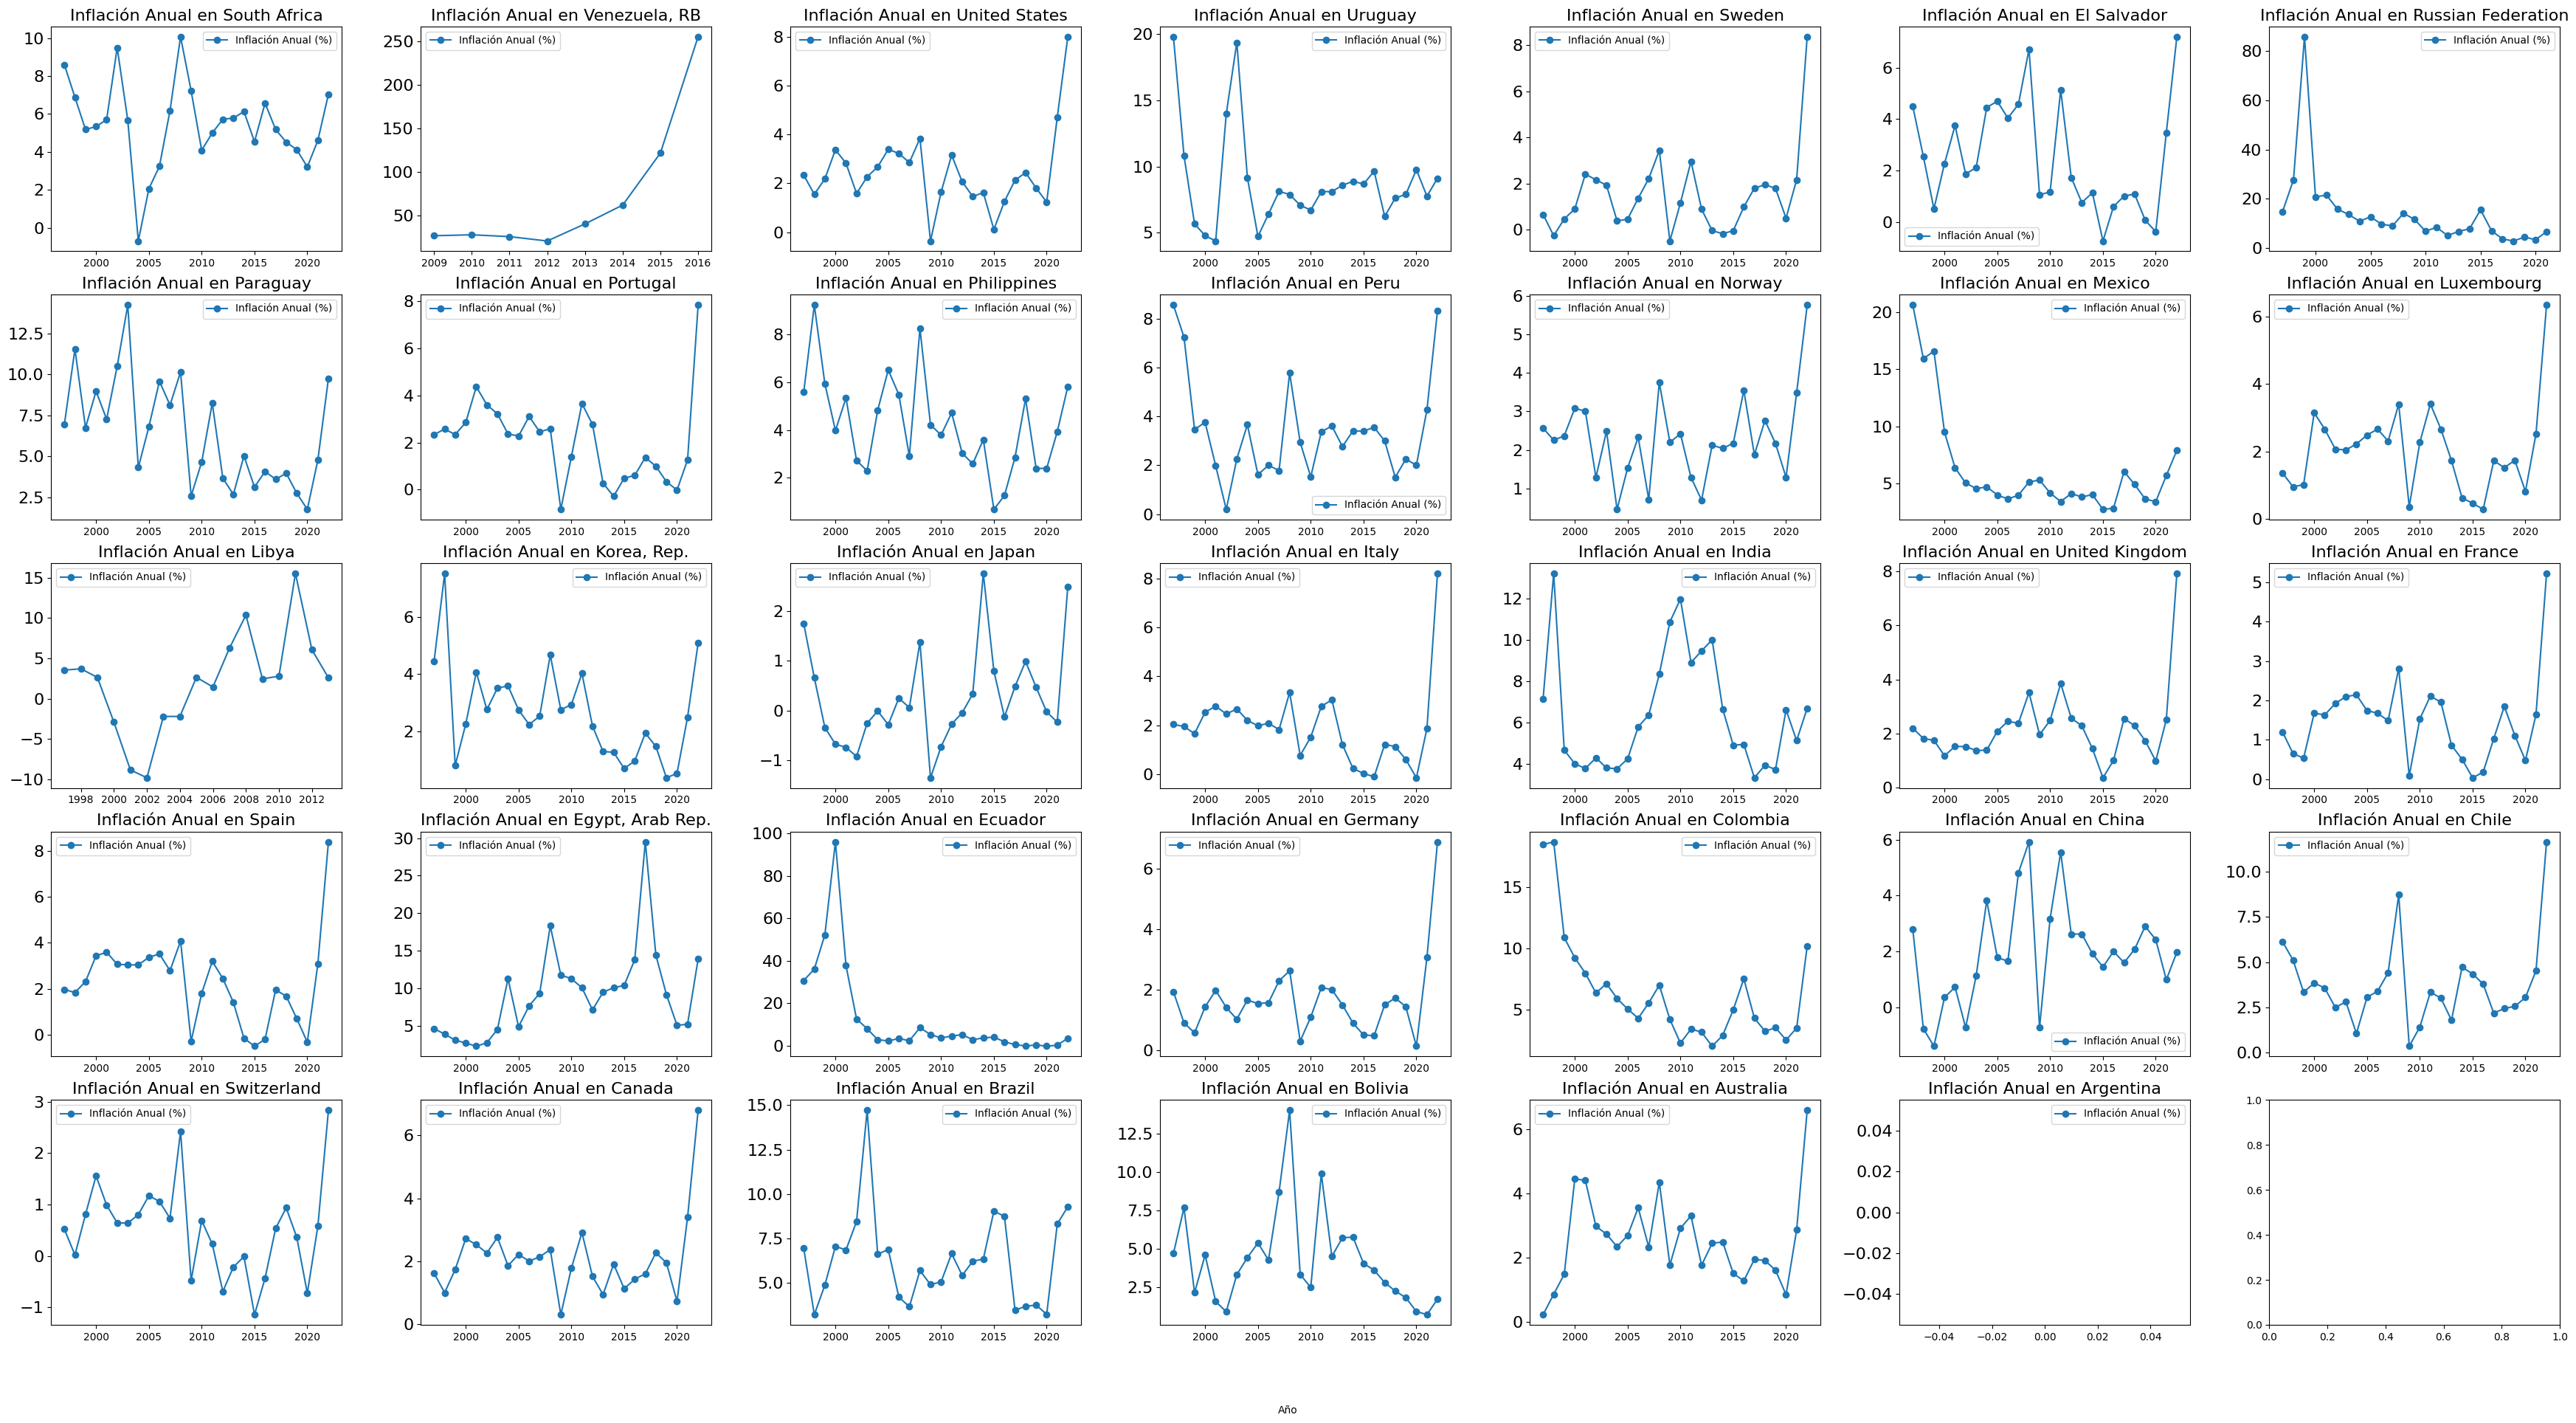

In [99]:
# se filtra los datos para incluir solo los últimos 25 años
datos_ultimos_20_anios = df[df['year'] >= (df['year'].max() - 25)]

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(35, 20))

for i, pais in enumerate(paises):
    fila = i // num_columnas
    columna = i % num_columnas
    
    datos_pais = datos_ultimos_20_anios[datos_ultimos_20_anios['full name'] == pais]
    
    axes[fila, columna].plot(datos_pais['year'], datos_pais['Inflation, consumer prices (annual %)'], label='Inflación Anual (%)', marker='o')
    
    axes[fila, columna].set_title(f'Inflación Anual en {pais}', fontsize=16)
    axes[fila, columna].legend()
    axes[fila, columna].tick_params(axis='y', labelsize=16)
fig.text(0.5, 0.04, 'Año', ha='center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()


Porcentaje del PIB invertido al gasto militar en porcentaje

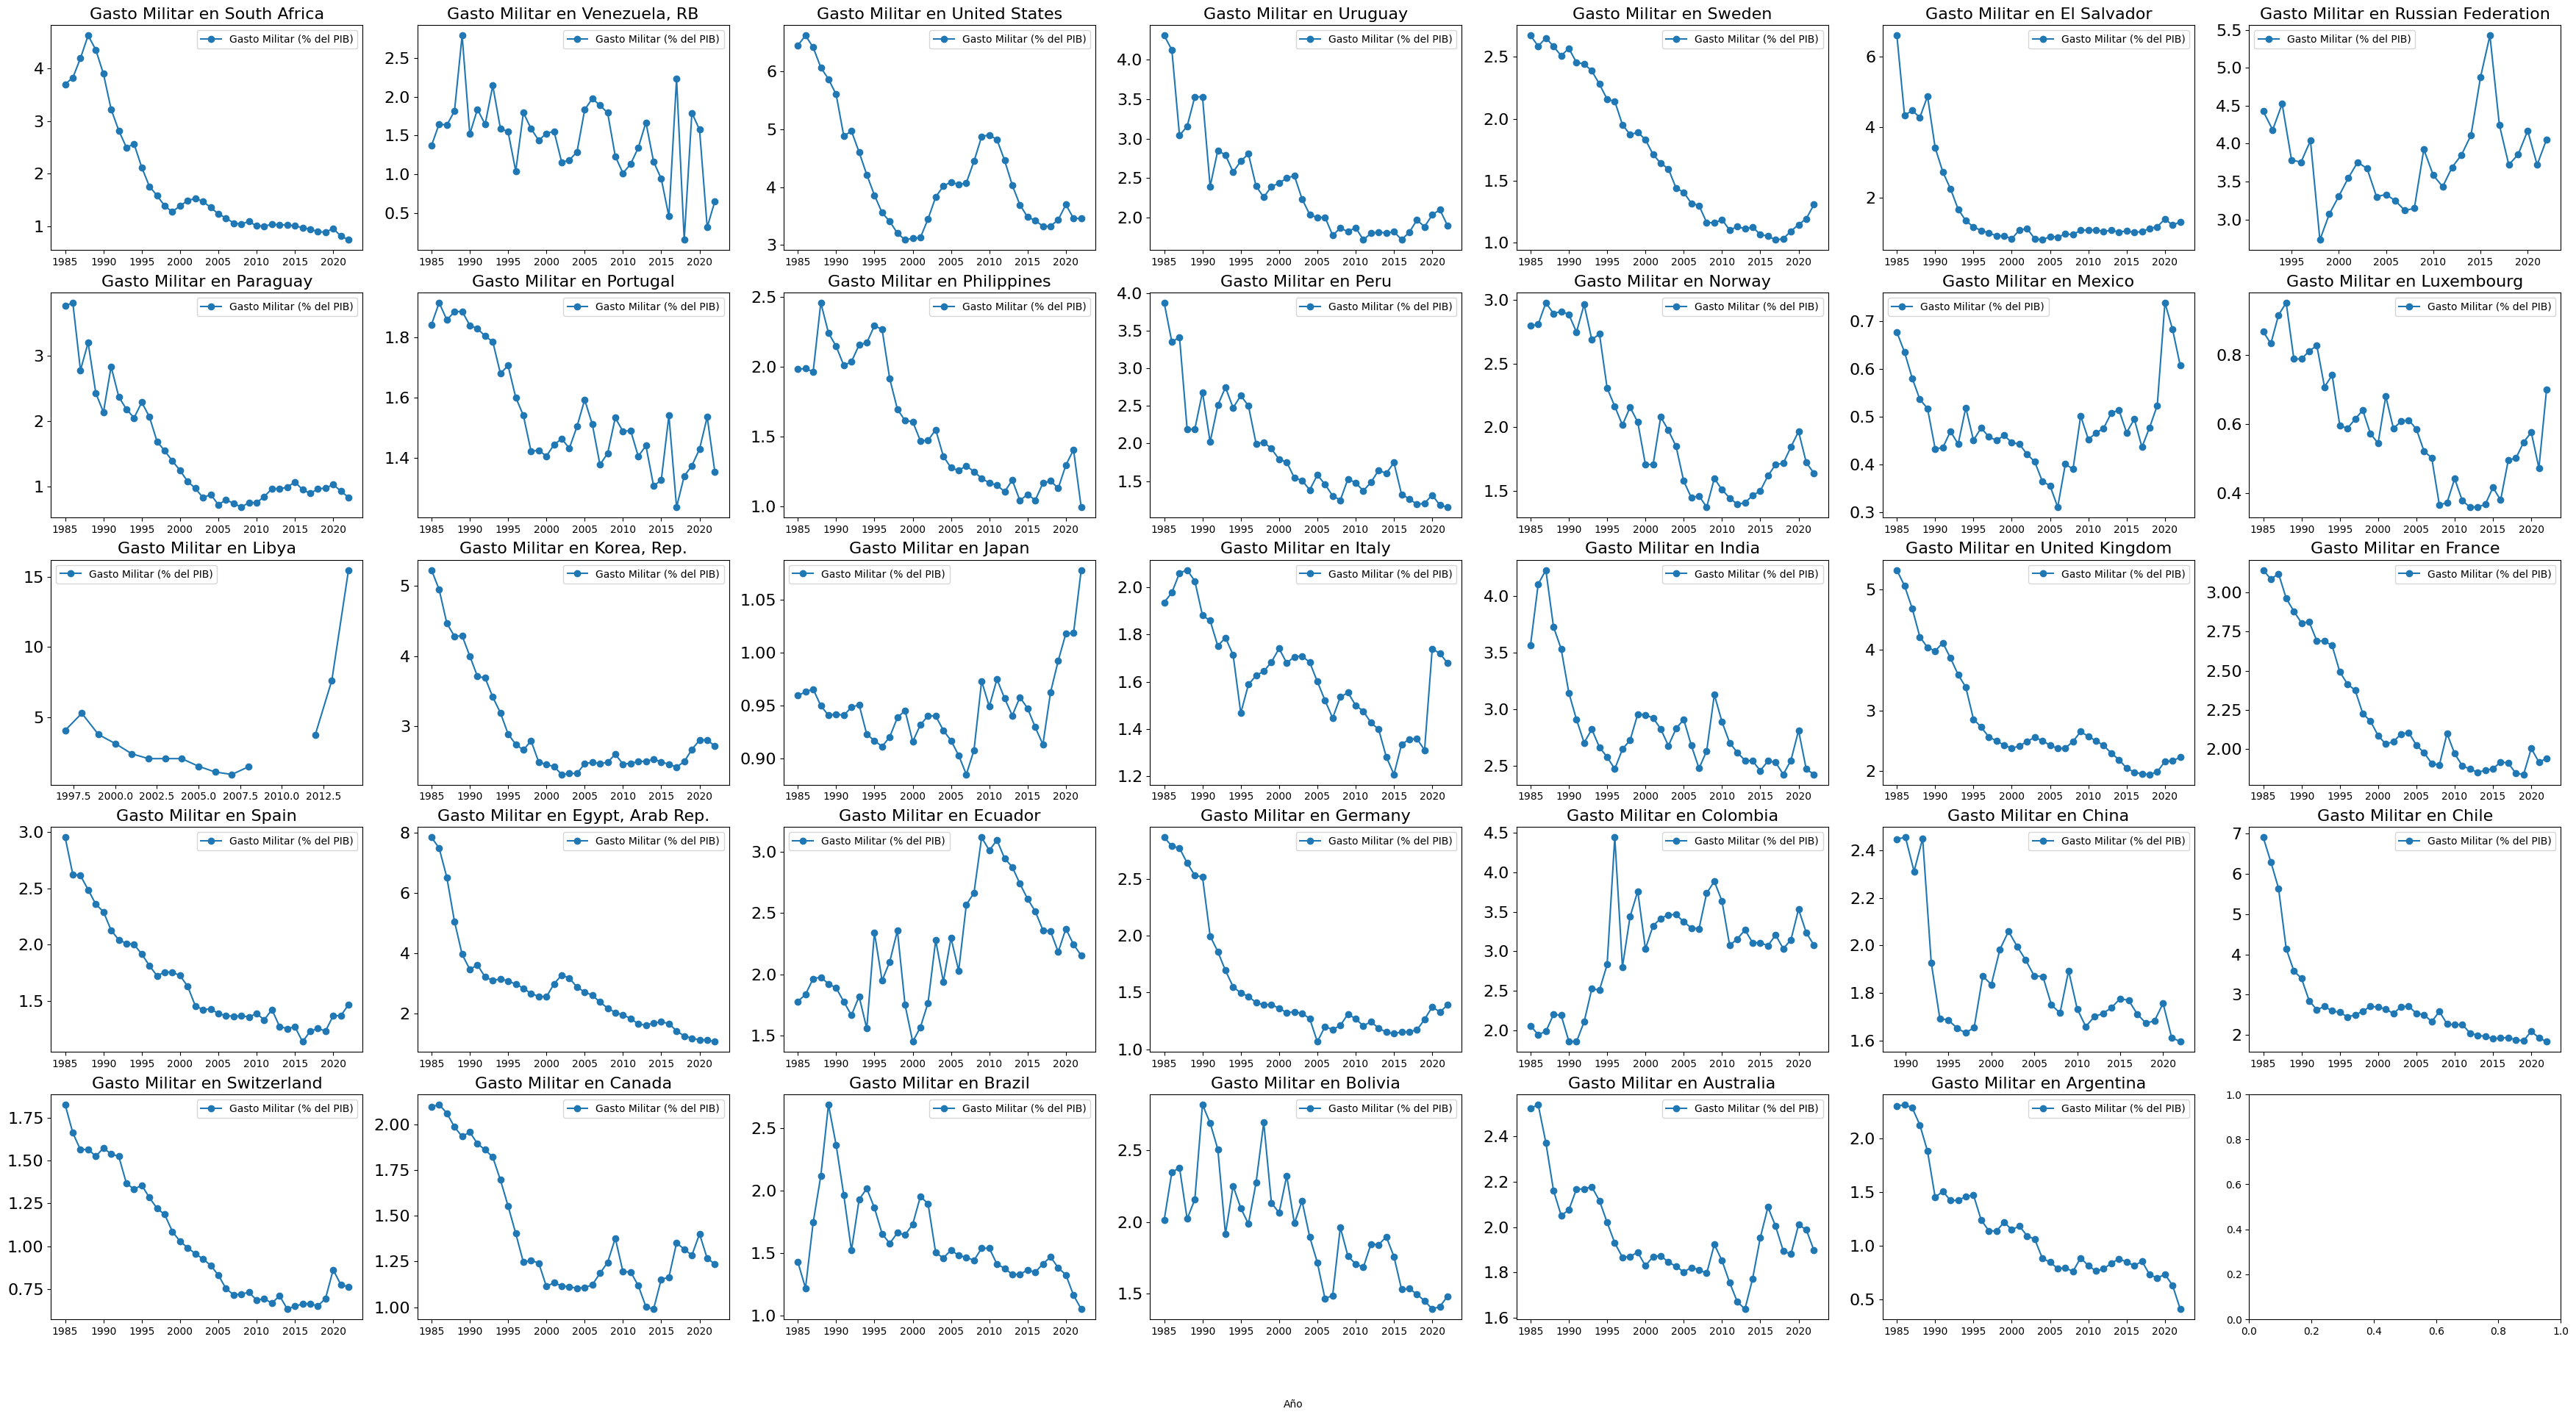

In [115]:
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(35, 20))
for i, pais in enumerate(paises):
    fila = i // num_columnas
    columna = i % num_columnas
    
    datos_pais = df[df['full name'] == pais]

    axes[fila, columna].plot(datos_pais['year'], datos_pais['Military expenditure (% of GDP)'], label='Gasto Militar (% del PIB)', marker='o')
    
    axes[fila, columna].set_title(f'Gasto Militar en {pais}', fontsize = 16)
    axes[fila, columna].legend()
    axes[fila, columna].tick_params(axis='y', labelsize=16)
fig.text(0.5, 0.04, 'Año', ha='center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

# Conclusiones
En base al analisis de los datos recolectados se puede llegar a la conclusion que aspectos importantes del ámbito socioéconomico de una población afecta directamente el nivel de vida de sus ciudadanos dandoles una posibilidad o no, de acceder a servicio importantes como lo es una poliza de seguros
La informacion suministrada por los datos recolectados nos da una señal de cuales son los paises que son una mejor opcion de expansion para la empresa de seguros La Vitalicia, ya que el propósito es garantizar que el capital colocado en la inversion sera retornado.

Segun los datos observados podemos ver que los siguientes 5 paises son las mejores opciones para la expansion de la empresa:
- Noruega
- Suiza
- Suecia
- Corea del Sur
- Australia
- Chile

Esto basado en el PIB per capita de cada pais, sus indices de vida y de muerte, acceso a la educacion universitaria